<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Netfilx Rotten Tomatoes Score Case Study </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#load_data)**
3. **[Exploratory Data Analysis](#EDA)**
   - 3.1 - [Understand the Dataset](#Understanding_Variables)
   - 3.2 - [Data Type](#change_datatype)
   - 3.3 - [Summary Statistics ](#summary)
   - 3.4 - [Univariate,BiaVariate and Multivariate Analysis ](#graph_analysis)
   - 3.5 - [Missing Values](#MissingValue)
   - 3.6 - [Handling Missing Values](#Clean_Data)
   - 3.7 - [Analysis of Outliers](#outlier)
   - 3.8 - [Statistical Analysis](#feature)
  
  
4. **[Apex- Best and Worst shows](#apex)**
   - 4.1 - [Analysis For Top,worst TV Series Categories](#Series)
   - 4.2 - [Analysis For Top,worst Movies Categories](#Movies)
   
   
5. **[Data Preprocessing -Feature Selection](#selection)**


6. **[Model Prediction](#prediction)**
   - 6.1 -[Base Model Prediction](#base)
   - 6.2 -[Linear Model Prediction](#linear)
   - 6.3 -[Decision Tree](#decision)
   - 6.4 -[XGBoost](#xgb)
   

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

<a id='load_data'></a>
# 2. Read Data

In [2]:
# Read the file using pandas
netflix = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

<a id='EDA'></a>
# 3. Exploratory Data Analysis

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building models. <br><br>
                        Here we analyze the data with the following steps:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns<br>
                        2. Check the data type. Refer data definition to validate the data type  <br>
                        3. Check the distribution of variables<br>
                        4. Check for the outliers
                        5. Study summary statistics<br>
                        6. Check for missing values<br>
                        7. Scale the data<br><br>
                        Note: it is an art to explore the data and one needs more and more practice to gain expertise in this area.
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Explore the Data:
In which we check data dimention,missing value,Handle Missing Data,Statistical Summaries,
Visualize Univariate Distributions,Analyze Categorical Variables,
Explore Relationships
(bivariate or multivariate analysis. Use scatter plots, line plots, or heatmaps to identify correlations)
Assess Outliers
(Visualize box plots, scatter plots, or use statistical methods like Z-score or IQR to identify and investigate potential outliers)
Explore Data Segmentation
Document Insights

<a id='Understanding_Variables'></a>
## 3.1 Understand the Dataset

#### Dimensions of the data

In [3]:
# Check data dimensions

rows, columns = netflix.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 15480
Number of columns: 29


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> There are 15480 observations and 29 columns in the dataset. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='change_datatype'></a>
## 3.2 Data Type 

The main data types stored in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numerical variables should have data type 'int64' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [4]:
# 'dytpes' gives the every column data type 
netflix.dtypes

Title                     object
Genre                     object
Tags                      object
Languages                 object
Series or Movie           object
Hidden Gem Score         float64
Country Availability      object
Runtime                   object
Director                  object
Writer                    object
Actors                    object
View Rating               object
IMDb Score               float64
Rotten Tomatoes Score    float64
Metacritic Score         float64
Awards Received          float64
Awards Nominated For     float64
Boxoffice                 object
Release Date              object
Netflix Release Date      object
Production House          object
Netflix Link              object
IMDb Link                 object
Summary                   object
IMDb Votes               float64
Image                     object
Poster                    object
TMDb Trailer              object
Trailer Site              object
dtype: object

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> All the variables have the data type as per the data definition. Thus, there is no need for type conversion.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Observation of data head(), tail(), info(), and describe()


**FIst Five Observation of Data**

In [5]:
netflix.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2           Centigrade                         Drama, Thriller   
3                ANNE+                                   Drama   
4                Moxie                 Animation, Short, Drama   

                                                Tags         Languages  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   
1       Dramas,Comedies,Films Based on Books,British           English   
2                                          Thrillers           English   
3        TV Dramas,Romantic TV Dramas,Dutch TV Shows           Turkish   
4  Social Issue Dramas,Teen Movies,Dramas,Comedie...           English   

  Series or Movie  Hidden Gem Score  \
0          Series               4.3   
1           Movie               7.0   
2           Movie               6.4   
3          Series               7.7   
4           Movie               8.1   

                                Country Availability       Runtime  \
0                                           Thailand  < 30 minutes   
1                                             Canada      1-2 hour   
2                                             Canada      1-2 hour   
3                                Belgium,Netherlands  < 30 minutes   
4  Lithuania,Poland,France,Iceland,Italy,Spain,Gr...      1-2 hour   

          Director                      Writer  ... Netflix Release Date  \
0  Tomas Alfredson       John Ajvide Lindqvist  ...           2021-03-04   
1    Coky Giedroyc               Caitlin Moran  ...           2021-03-04   
2    Brendan Walsh  Brendan Walsh, Daley Nixon  ...           2021-03-04   
3              NaN                         NaN  ...           2021-03-04   
4    Stephen Irwin                         NaN  ...           2021-03-04   

                         Production House  \
0               Canal+, Sandrew Metronome   
1  Film 4, Monumental Pictures, Lionsgate   
2                                     NaN   
3                                     NaN   
4                                     NaN   

                             Netflix Link  \
0  https://www.netflix.com/watch/81415947   
1  https://www.netflix.com/watch/81041267   
2  https://www.netflix.com/watch/81305978   
3  https://www.netflix.com/watch/81336456   
4  https://www.netflix.com/watch/81078393   

                              IMDb Link  \
0  https://www.imdb.com/title/tt1139797   
1  https://www.imdb.com/title/tt4193072   
2  https://www.imdb.com/title/tt8945942   
3  https://www.imdb.com/title/tt6132758   
4  https://www.imdb.com/title/tt2023611   

                                             Summary  IMDb Votes  \
0  A med student with a supernatural gift tries t...    205926.0   
1  When nerdy Johanna moves to London, things get...      2838.0   
2  Trapped in a frozen car during a blizzard, a p...      1720.0   
3  Upon moving into a new place, a 20-something r...      1147.0   
4  Inspired by her moms rebellious past and a con...        63.0   

                                               Image  \
0  https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...   
1  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
2  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
3  https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...   
4  https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...   

                                              Poster  \
0  https://m.media-amazon.com/images/M/MV5BOWM4NT...   
1  https://m.media-amazon.com/images/M/MV5BZGUyN2...   
2  https://m.media-amazon.com/images/M/MV5BODM2MD...   
3  https://m.media-amazon.com/images/M/MV5BNWRkMz...   
4  https://m.media-amazon.com/images/M/MV5BODYyNW...   

                                  TMDb Trailer Trailer Site  
0                                          NaN          NaN  
1  https://www.youtube.com/watch?v=eIbcxPy4okQ      Yo

**Last Five Observation in Data**

In [6]:

netflix.tail()

Title  \
15475                     K-POP Extreme Survival   
15476            DreamWorks Shreks Swamp Stories   
15477  DreamWorks Happy Holidays from Madagascar   
15478                DreamWorks Holiday Classics   
15479   DreamWorks Kung Fu Panda Awesome Secrets   

                                   Genre  \
15475                                NaN   
15476                                NaN   
15477          Animation, Comedy, Family   
15478          Animation, Comedy, Family   
15479  Animation, Action, Comedy, Family   

                                                    Tags Languages  \
15475  TV Dramas,TV Programmes,TV Comedies,Romantic T...       NaN   
15476  Animal Tales,Family Comedies,Family Adventures...       NaN   
15477  TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...   English   
15478  TV Comedies,Kids TV,TV Cartoons,TV Programmes,...   English   
15479  TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...   English   

      Series or Movie  Hidden Gem Score  \
15475          Series               NaN   
15476          Series               NaN   
15477          Series               8.4   
15478          Series               8.2   
15479          Series               8.1   

                                    Country Availability       Runtime  \
15475  South Korea,Argentina,United Kingdom,Australia...  < 30 minutes   
15476  Russia,Hong Kong,Hungary,Australia,South Korea...  < 30 minutes   
15477  Belgium,Switzerland,United States,Germany,Unit...  < 30 minutes   
15478  Belgium,Switzerland,Germany,Argentina,United K...  < 30 minutes   
15479  Belgium,Switzerland,Germany,United Kingdom,Fra...  < 30 minutes   

      Director Writer  ... Netflix Release Date Production House  \
15475      NaN    NaN  ...           2015-04-14              NaN   
15476      NaN    NaN  ...           2015-04-14              NaN   
15477      NaN    NaN  ...           2015-04-14              NaN   
15478      NaN    NaN  ...           2015-04-14              Fox   
15479      NaN    NaN  ...           2015-04-14              NaN   

                                 Netflix Link  IMDb Link  \
15475  https://www.netflix.com/watch/80031595        NaN   
15476  https://www.netflix.com/watch/70242630        NaN   
15477  https://www.netflix.com/watch/70259784        NaN   
15478  https://www.netflix.com/watch/70221348        NaN   
15479  https://www.netflix.com/watch/70241791        NaN   

                                                 Summary  IMDb Votes  \
15475  Seung Yeon decides to chase her dream of becom...         NaN   
15476  Shrek celebrates Halloween, Puss in Boots is c...         NaN   
15477  Madagascar goes wild with holiday spirit in th...        71.0   
15478  Join your DreamWorks friends for these four ho...        82.0   
15479  In this pair of adventures, Po tells the story...        17.0   

                                                   Image Poster TMDb Trailer  \
15475  https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...    NaN          NaN   
15476  https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...    NaN          NaN   
15477  https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...    NaN          NaN   
15478  https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...    NaN          NaN   
15479  https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...    NaN          NaN   

      Trailer Site  
15475          NaN  
15476          NaN  
15477          NaN  
15478          NaN  
15479          NaN  

[5 rows x 29 columns]

<a id='summary'></a>
## 3.3 Summary Statistics

**Five pint summary of data**

In [7]:
#The describe() returns the statistical summary of the variables by default, it returns the summary of numerical variables
netflix.describe() 

Hidden Gem Score    IMDb Score  Rotten Tomatoes Score  \
count      13379.000000  13381.000000            6382.000000   
mean           5.937551      6.496054              59.523034   
std            2.250202      1.146910              26.999173   
min            0.600000      1.000000               0.000000   
25%            3.800000      5.800000              38.000000   
50%            6.800000      6.600000              64.000000   
75%            7.900000      7.300000              83.000000   
max            9.800000      9.700000             100.000000   

       Metacritic Score  Awards Received  Awards Nominated For    IMDb Votes  
count       4336.000000      6075.000000           7661.000000  1.337900e+04  
mean          56.813653         8.764444             13.983161  4.272841e+04  
std           17.582545        18.311171             29.821052  1.257012e+05  
min            5.000000         1.000000              1.000000  5.000000e+00  
25%           44.000000         1.000000              2.000000  4.035000e+02  
50%           57.000000         3.000000              5.000000  2.322000e+03  
75%           70.000000         8.000000             12.000000  2.089050e+04  
max          100.000000       300.000000            386.000000  2.354197e+06

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above output illustrates the summary statistics of the numerical variables.<br>
                        The average Rotten Tamatoes Score  for rating is 59% Whereas the average IMDb score is 6.4.
                        for average votes for Rotten Tamatoes Score is 42%.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Check datatype , column information and non null values**

In [8]:
a = netflix.Genre.str.split(',', expand=True)
a[0].value_counts()

Comedy         3407
Drama          2567
Action         2182
Animation      1649
Documentary    1028
Crime           716
Biography       433
Adventure       429
Horror          374
Short           234
Reality-TV      119
Family          117
Romance         107
Thriller        105
Mystery          68
Fantasy          65
Game-Show        40
Music            28
Sci-Fi           21
Musical          20
Adult            15
History          12
Talk-Show        10
Sport            10
Western           9
News              2
War               2
Film-Noir         1
Name: 0, dtype: int64

<a id='graph_analysis'></a>
## 3.4 Univariate ,Bivariate and Multivariate Analysis

### Univariate Analysis

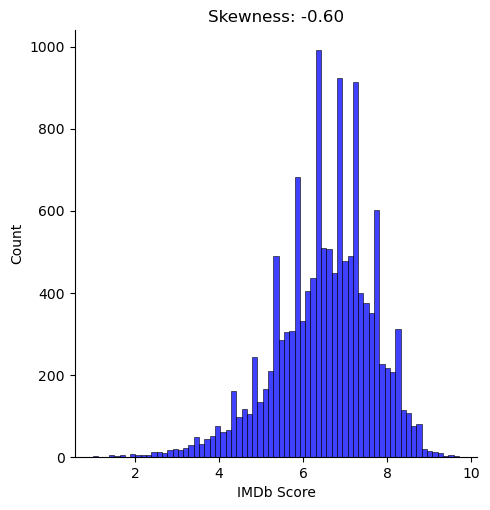

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(netflix['IMDb Score'], color='blue')
plt.title("Skewness: %.2f" % netflix['IMDb Score'].skew())
plt.show()


In [10]:
netflix['IMDb Score'].describe()

count    13381.000000
mean         6.496054
std          1.146910
min          1.000000
25%          5.800000
50%          6.600000
75%          7.300000
max          9.700000
Name: IMDb Score, dtype: float64

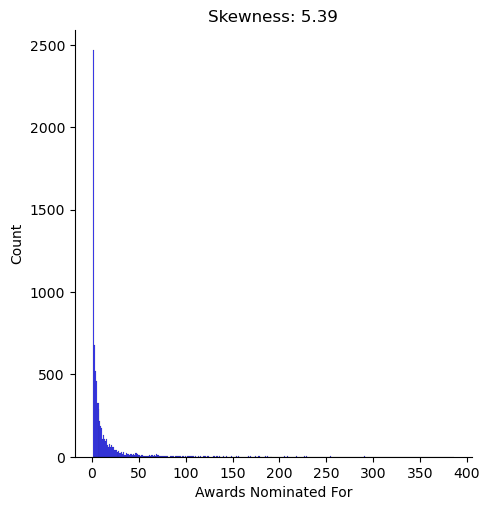

In [11]:
# For Award Nominated

sns.displot(netflix['Awards Nominated For'], color='blue')
plt.title("Skewness: %.2f" % netflix['Awards Nominated For'].skew())
plt.show()


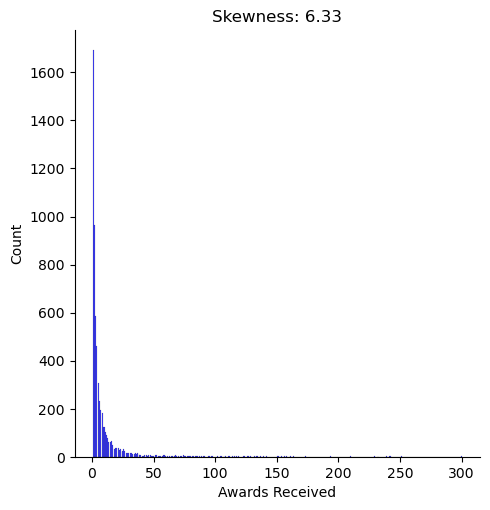

In [12]:
# Check Skewness For Award Received 

sns.displot(netflix['Awards Received'], color='blue')
plt.title("Skewness: %.2f" % netflix['Awards Received'].skew())
plt.show()


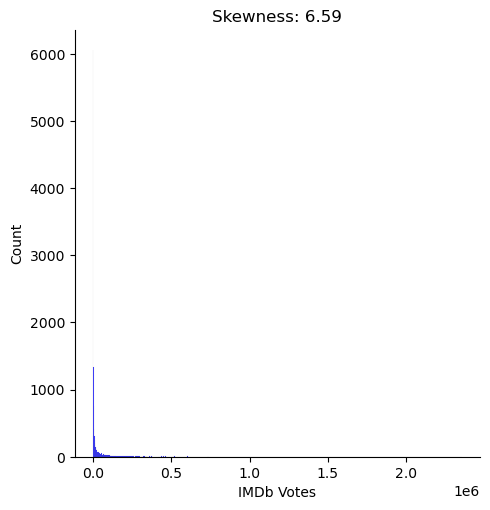

In [13]:
sns.displot(netflix['IMDb Votes'], color='blue')
plt.title("Skewness: %.2f" % netflix['IMDb Votes'].skew())
plt.show()

# Here we can se that the data have +ve skewed or skewness is also high 6.5

#### Categorical Columns 

In [14]:
cat_cols = netflix.select_dtypes(include=['object'])
cat_cols.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors',
       'View Rating', 'Boxoffice', 'Release Date', 'Netflix Release Date',
       'Production House', 'Netflix Link', 'IMDb Link', 'Summary', 'Image',
       'Poster', 'TMDb Trailer', 'Trailer Site'],
      dtype='object')

In [15]:
cat_imp = ['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie','Country Availability',
           'View Rating']

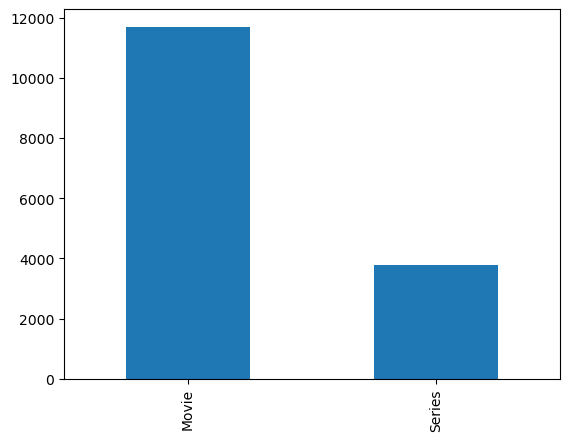

In [16]:
# Create a countplot of the `Series or Movie` column.
netflix['Series or Movie'].value_counts().plot(kind='bar')
plt.show()

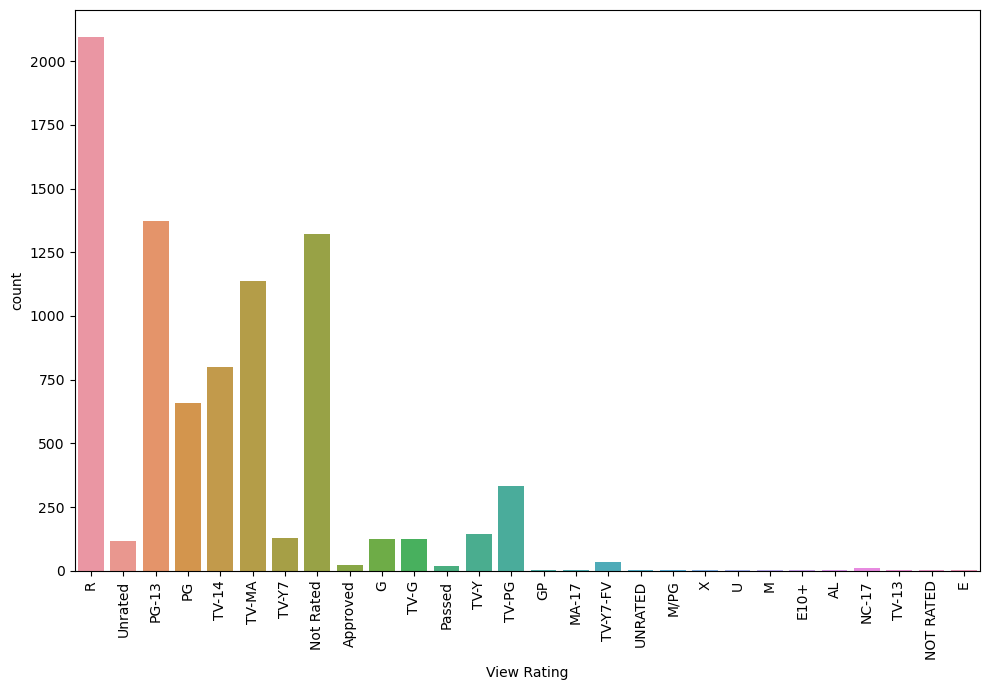

In [17]:
# count plot based on view rating
plt.figure(figsize=[10,7])
sns.countplot(x = 'View Rating', data = netflix)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

#### Bi-Variate 

In [18]:
# Num vs Num

In [19]:
numcol = netflix.select_dtypes(include=np.number).columns
numcol

Index(['Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score',
       'Metacritic Score', 'Awards Received', 'Awards Nominated For',
       'IMDb Votes'],
      dtype='object')

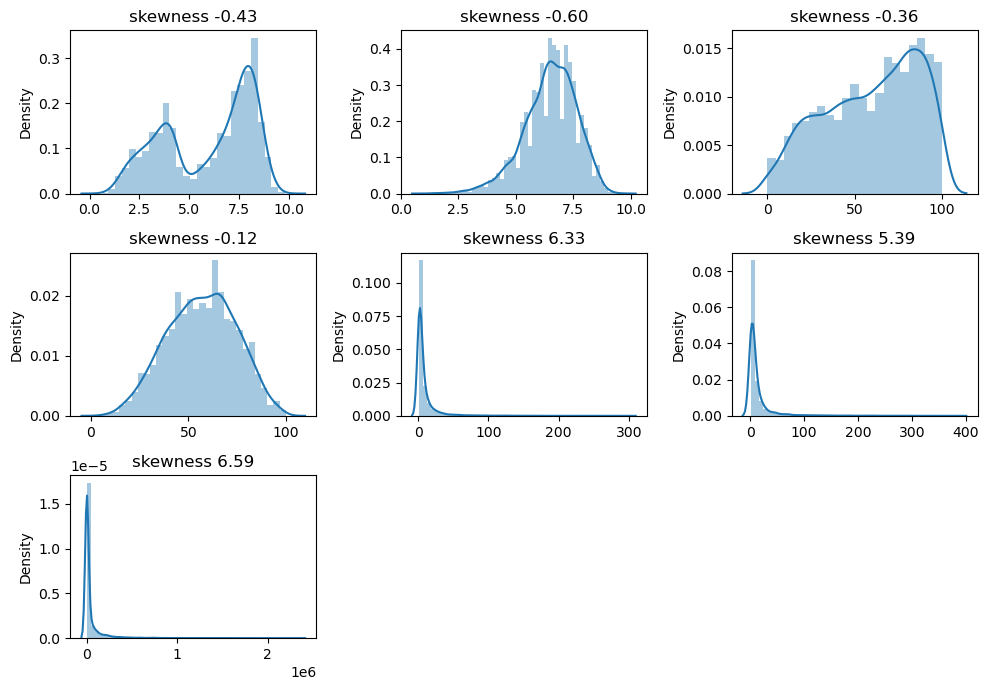

In [20]:
plt.figure(figsize=(10,7))
nrow = 3
ncols = 3
repeater = 1
for i in numcol:
    plt.subplot(nrow, ncols, repeater)
    sns.distplot(netflix.loc[:, i].values)  # Convert to numpy array using .values
    plt.title('skewness %.2f' % netflix.loc[:, i].skew())
    repeater += 1
    
plt.tight_layout()
plt.show()

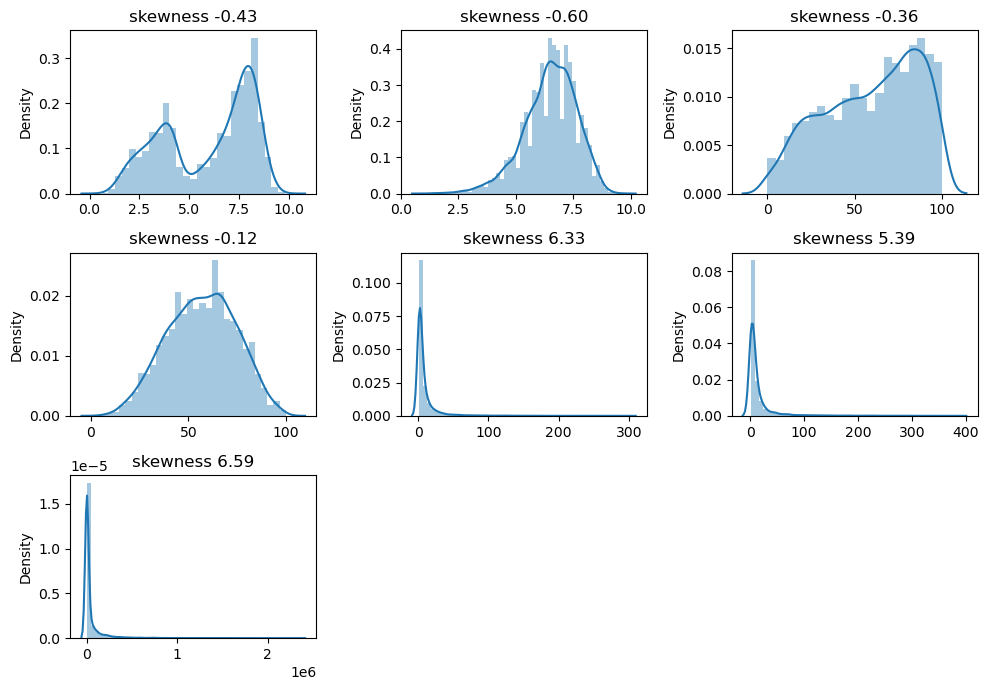

In [21]:
plt.figure(figsize=(10,7))
nrow=3
ncols=3
repeater=1
for i in numcol:
    plt.subplot(nrow,ncols,repeater)
    sns.distplot(netflix.loc[:,i].values)
    plt.title('skewness %.2f'%netflix.loc[:,i].skew())
    repeater=repeater+1
plt.tight_layout()
plt.show()

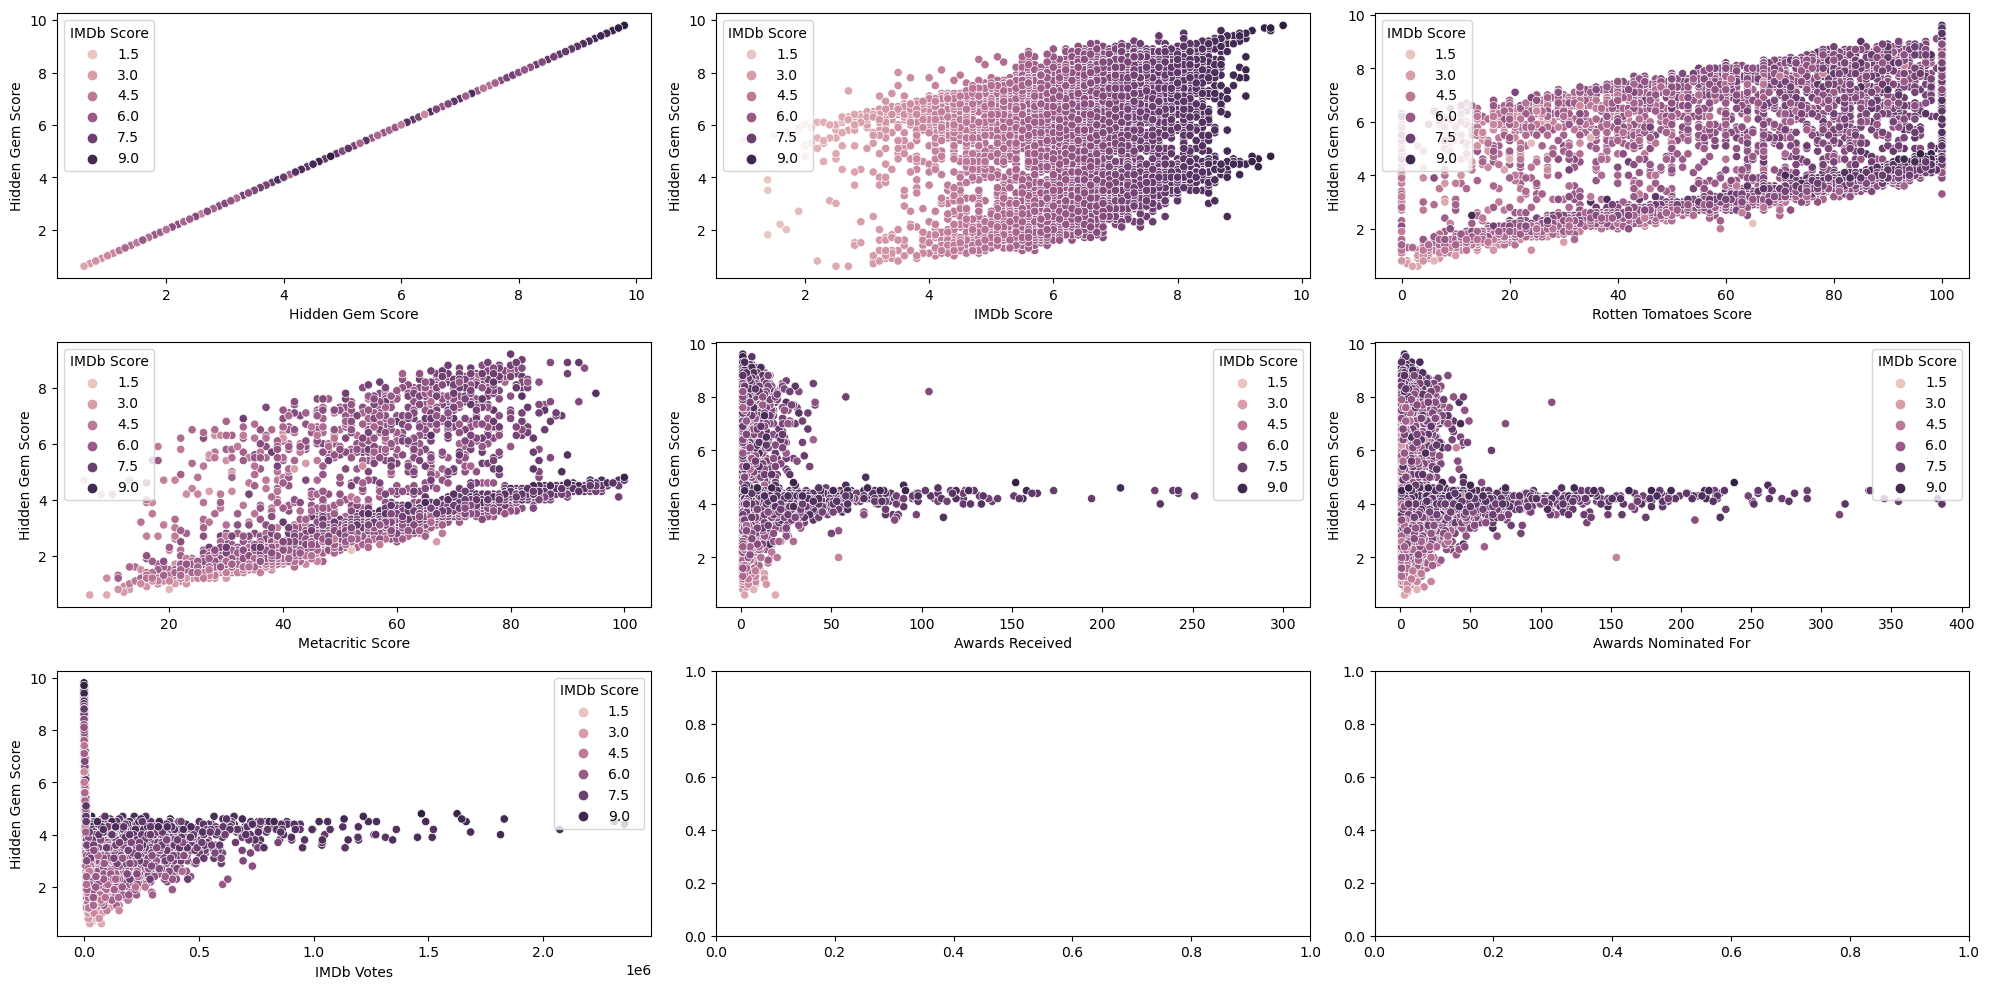

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(numcol):
    sns.scatterplot(x=var, y='Hidden Gem Score', hue='IMDb Score', data=netflix, ax=axs[i])

fig.tight_layout()
plt.show()

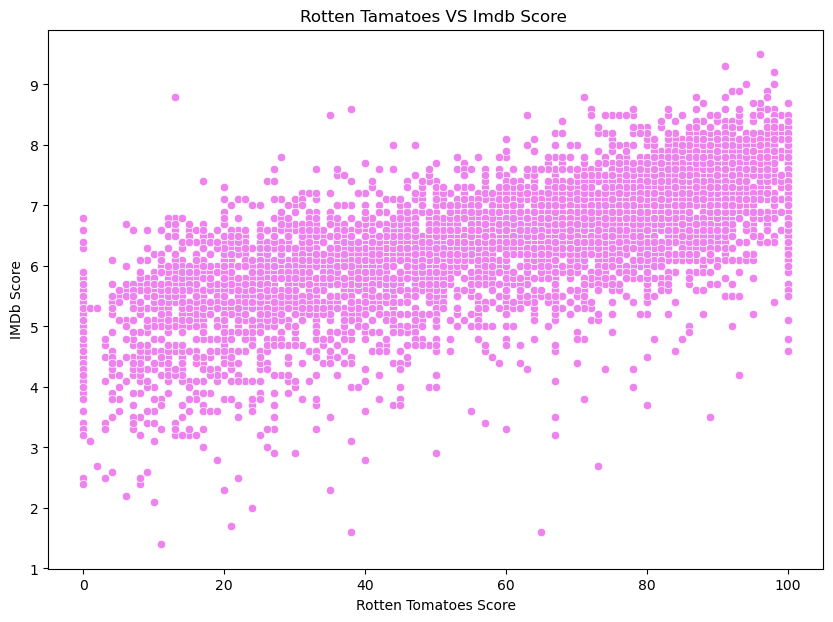

In [23]:
# compare rotten tamatto score vs IMDb score 
plt.figure(figsize=(10,7))
sns.scatterplot(x='Rotten Tomatoes Score',y='IMDb Score',data=netflix, color="violet")
plt.title('Rotten Tamatoes VS Imdb Score ')
plt.show()

In [24]:
# Correlation Coefficient 
corr_rotten = netflix['IMDb Score'].corr(netflix['Rotten Tomatoes Score'])
corr_rotten

# There is a good relation between IMDb Score and Rotten Tommatoes Score

0.7109218973532023

The correlation coefficient is close to 1, which indicates that there is a strong positive
relationship between the  **'Rotten Tomatoes Score'**  and **'IMDb Score'**.

In [25]:
# Correlation between IMDb Score and HIdden Gem score
corr = netflix['IMDb Score'].corr(netflix['Hidden Gem Score'])
corr

# There is a weak reation between IMDb and Hidden Gem Score

0.12037334447063835

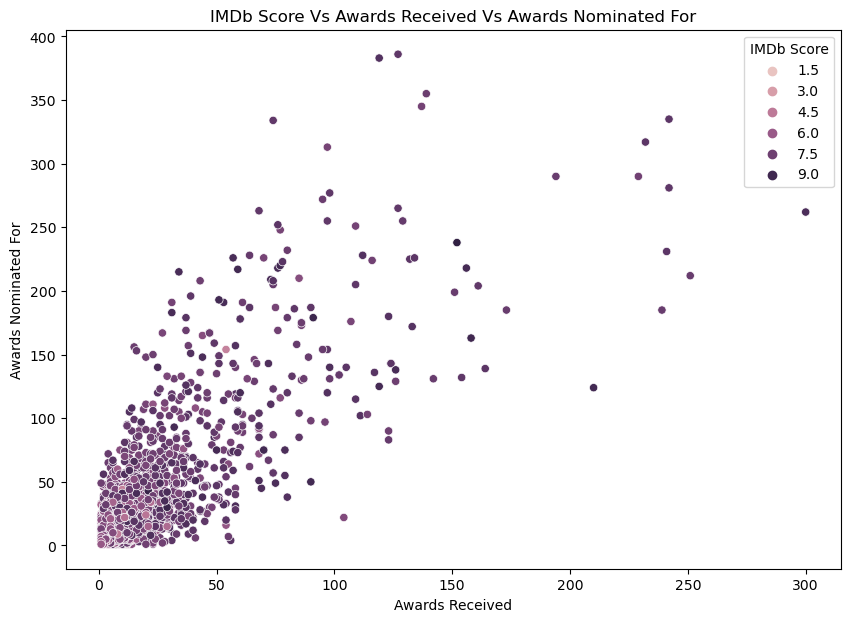

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Awards Received',y= 'Awards Nominated For',hue='IMDb Score',data=netflix, color="aqua")
plt.title('IMDb Score Vs Awards Received Vs Awards Nominated For')
plt.show()

**Multi-variate Analysis**

In [27]:
# Correlation matrix between  numeric Data
correlation_matrix= netflix.corr()

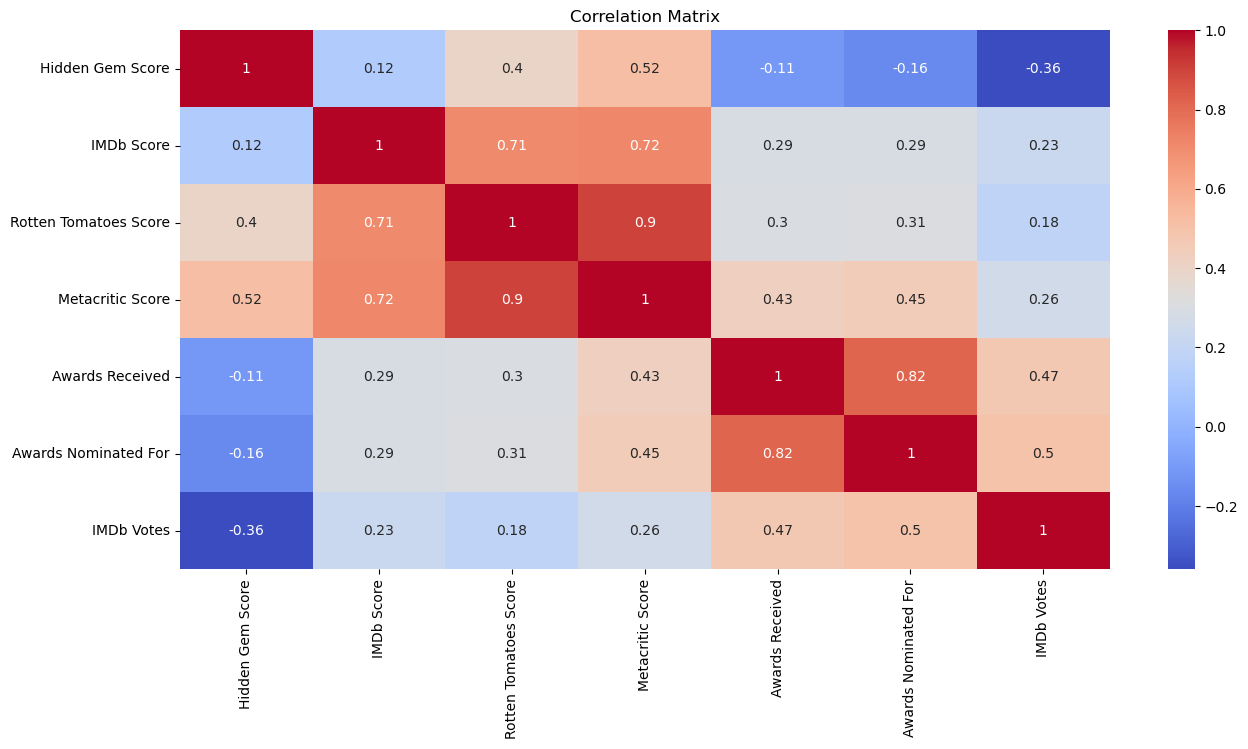

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
covariance_matrix = netflix.cov()
covariance_matrix=pd.DataFrame(covariance_matrix)
covariance_matrix

Hidden Gem Score    IMDb Score  Rotten Tomatoes Score  \
Hidden Gem Score               5.063408      0.310652              22.460457   
IMDb Score                     0.310652      1.315401              19.737274   
Rotten Tomatoes Score         22.460457     19.737274             728.955354   
Metacritic Score              15.186311     12.148319             438.719923   
Awards Received               -4.514062      5.206534             154.953282   
Awards Nominated For         -10.621357      8.671811             253.092593   
IMDb Votes               -101696.891119  33123.486458          832598.469114   

                       Metacritic Score  Awards Received  \
Hidden Gem Score              15.186311    -4.514062e+00   
IMDb Score                    12.148319     5.206534e+00   
Rotten Tomatoes Score        438.719923     1.549533e+02   
Metacritic Score             309.145890     1.700924e+02   
Awards Received              170.092450     3.352990e+02   
Awards Nominated For         274.045979     5.444340e+02   
IMDb Votes                894530.120511     1.514909e+06   

                       Awards Nominated For    IMDb Votes  
Hidden Gem Score              -1.062136e+01 -1.016969e+05  
IMDb Score                     8.671811e+00  3.312349e+04  
Rotten Tomatoes Score          2.530926e+02  8.325985e+05  
Metacritic Score               2.740460e+02  8.945301e+05  
Awards Received                5.444340e+02  1.514909e+06  
Awards Nominated For           8.892951e+02  2.375253e+06  
IMDb Votes                     2.375253e+06  1.580079e+10

**Hidden Gem Score, IMDb Score, Rotten Tomatoes Score, and Metacritic Score: 
These columns represent different ratings or scores for movies. In those columns we can see positive covariances
between these variables, indicating that higher ratings in one score are
associated with higher ratings in the other scores.
And in Rotten Tomatoes Score we can se that there is a High cov. in a data**

**Pair Plot**

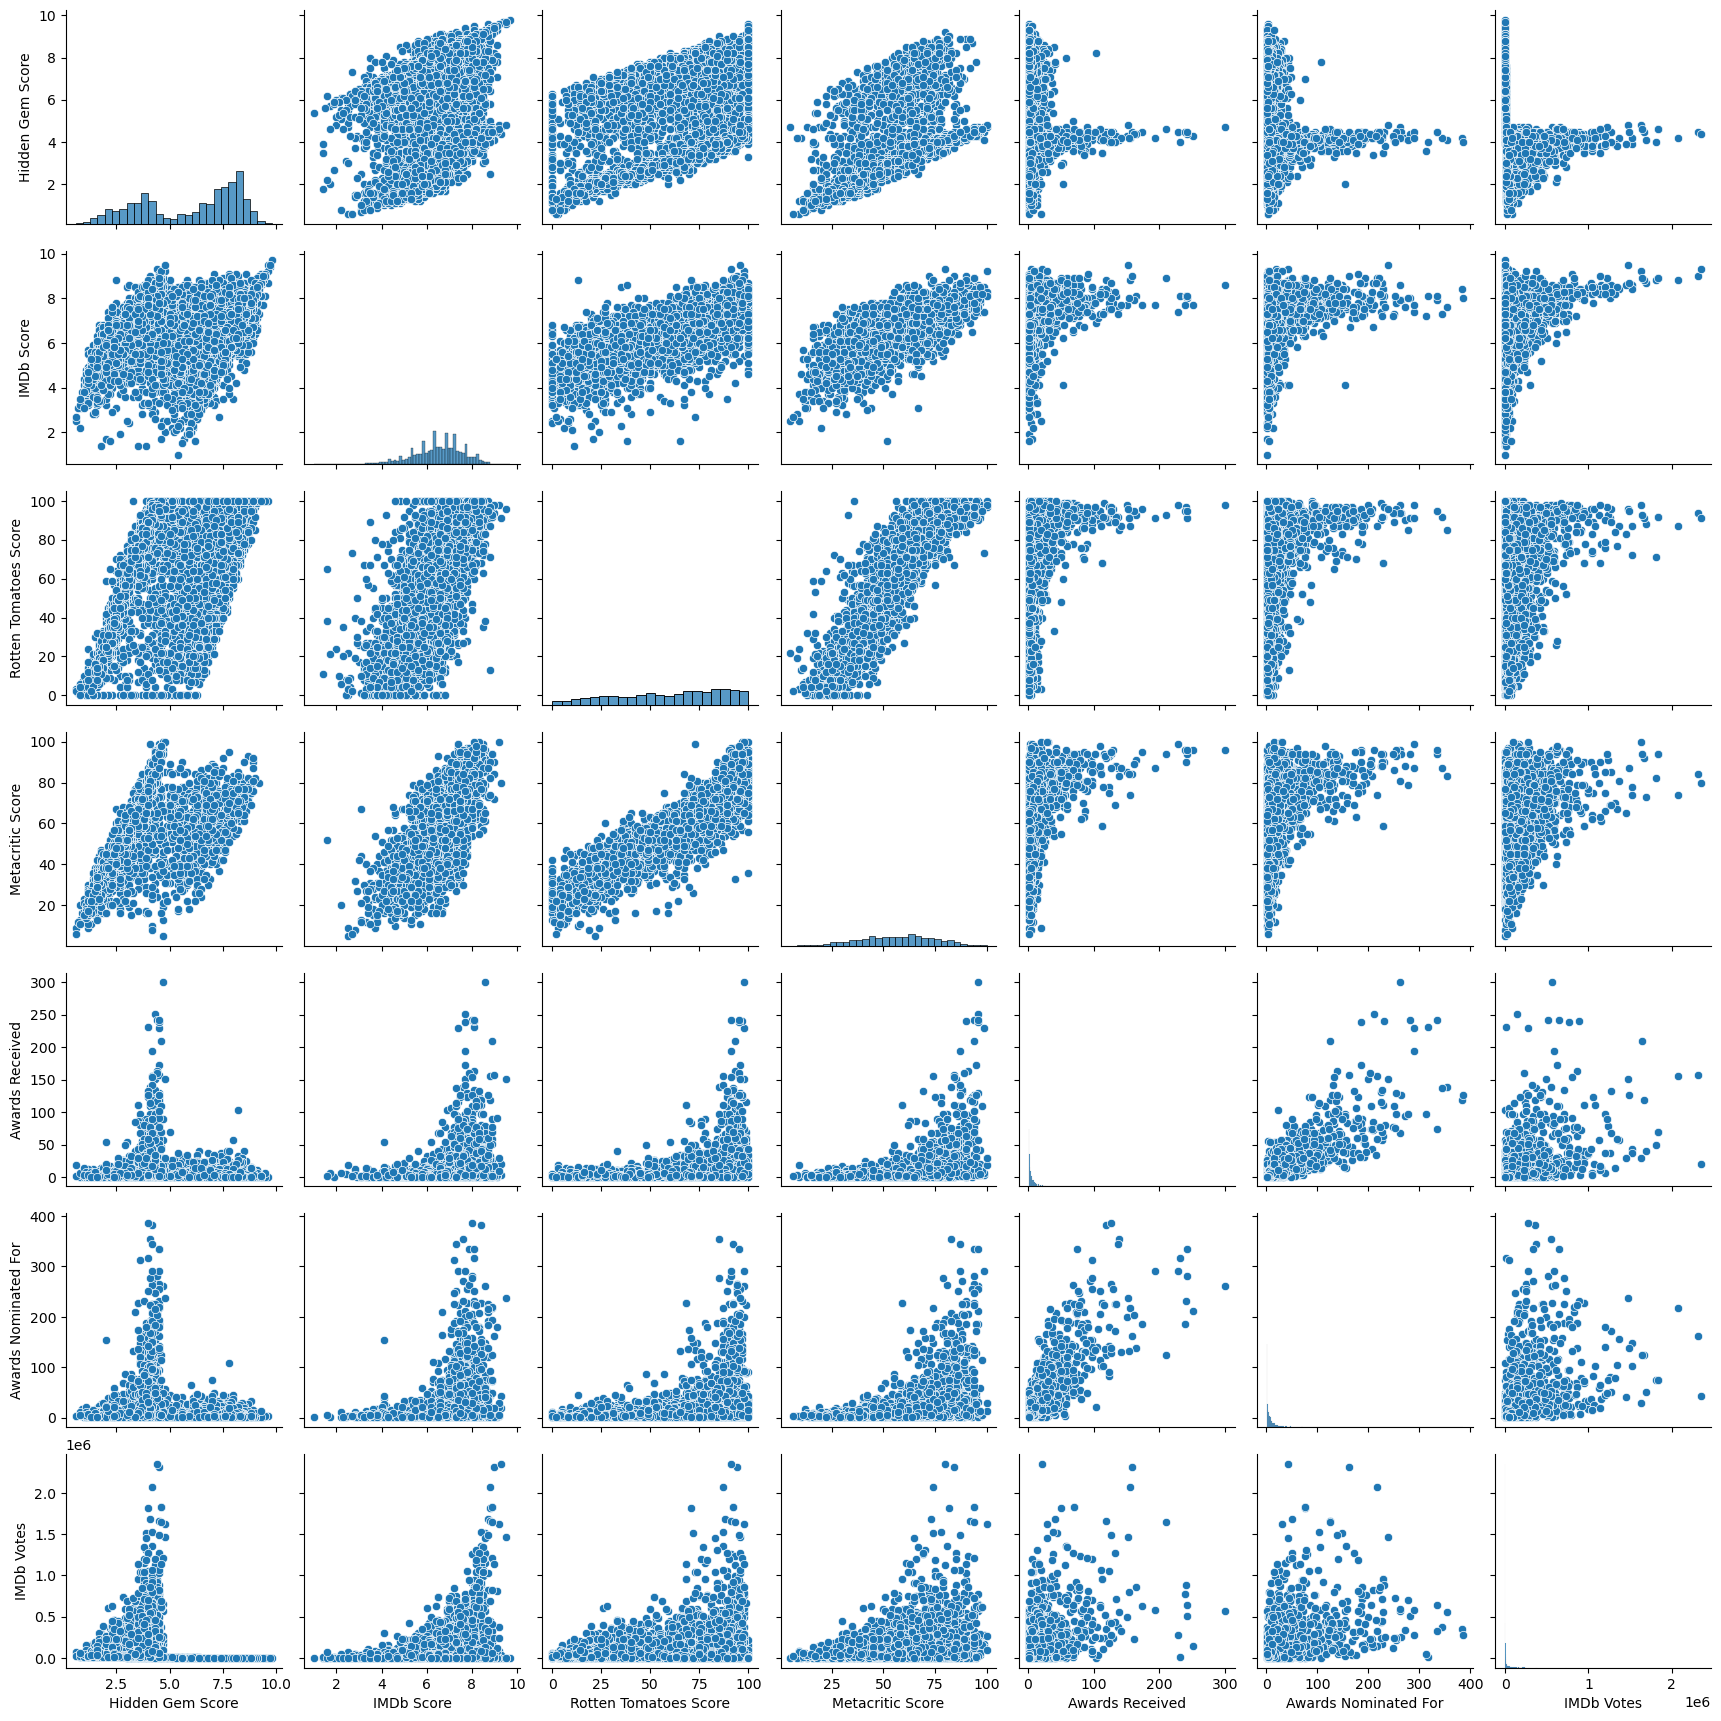

In [30]:
sns.pairplot(netflix,diag_kind='hist')
plt.show()

<Figure size 1500x700 with 0 Axes>

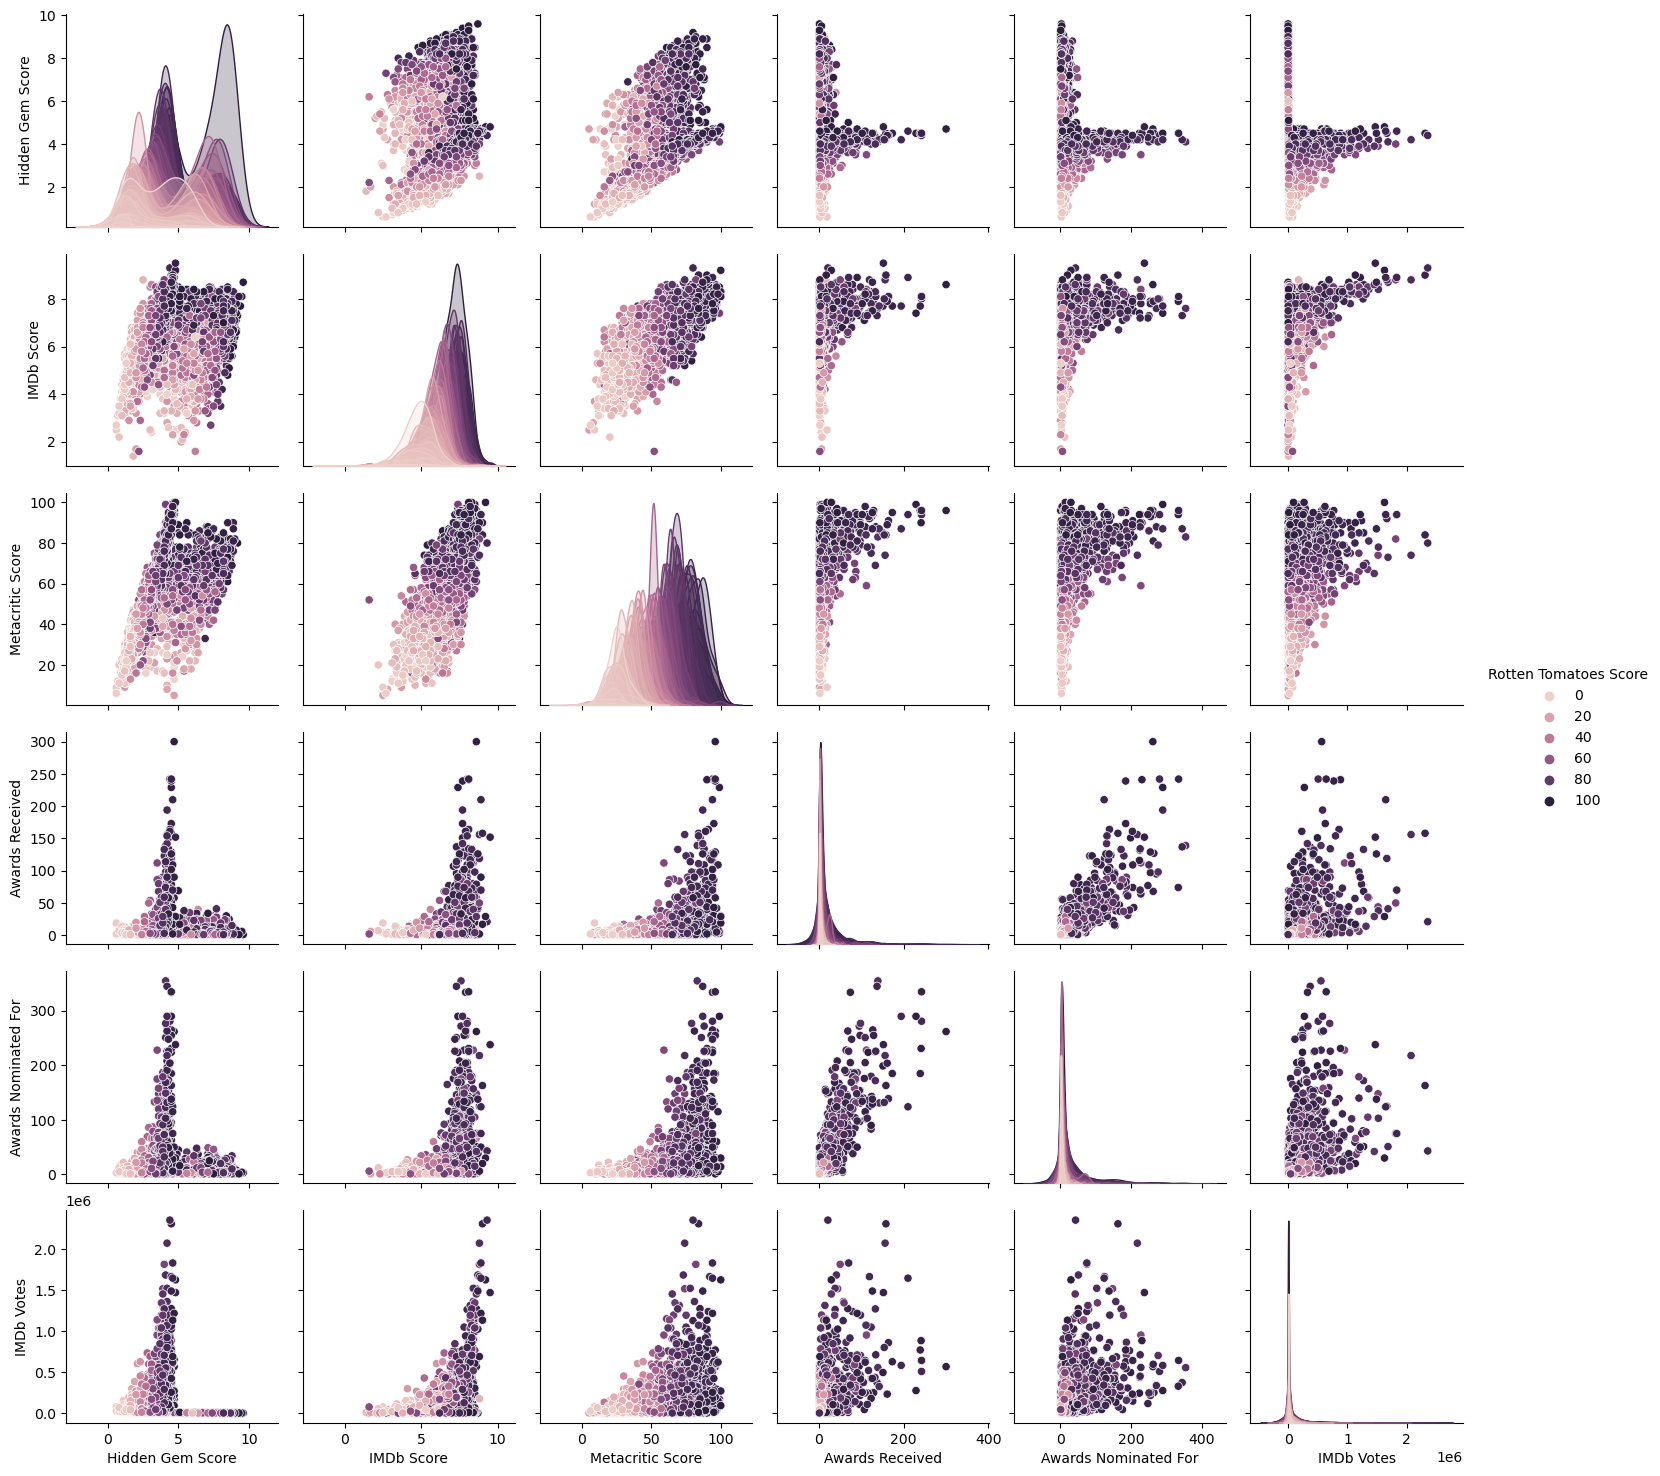

In [31]:
# Pairplot between Target variable and all Numeric Columns.
plt.figure(figsize=(15,7))
sns.pairplot(netflix,hue='Rotten Tomatoes Score')
plt.show()

<Figure size 1500x700 with 0 Axes>

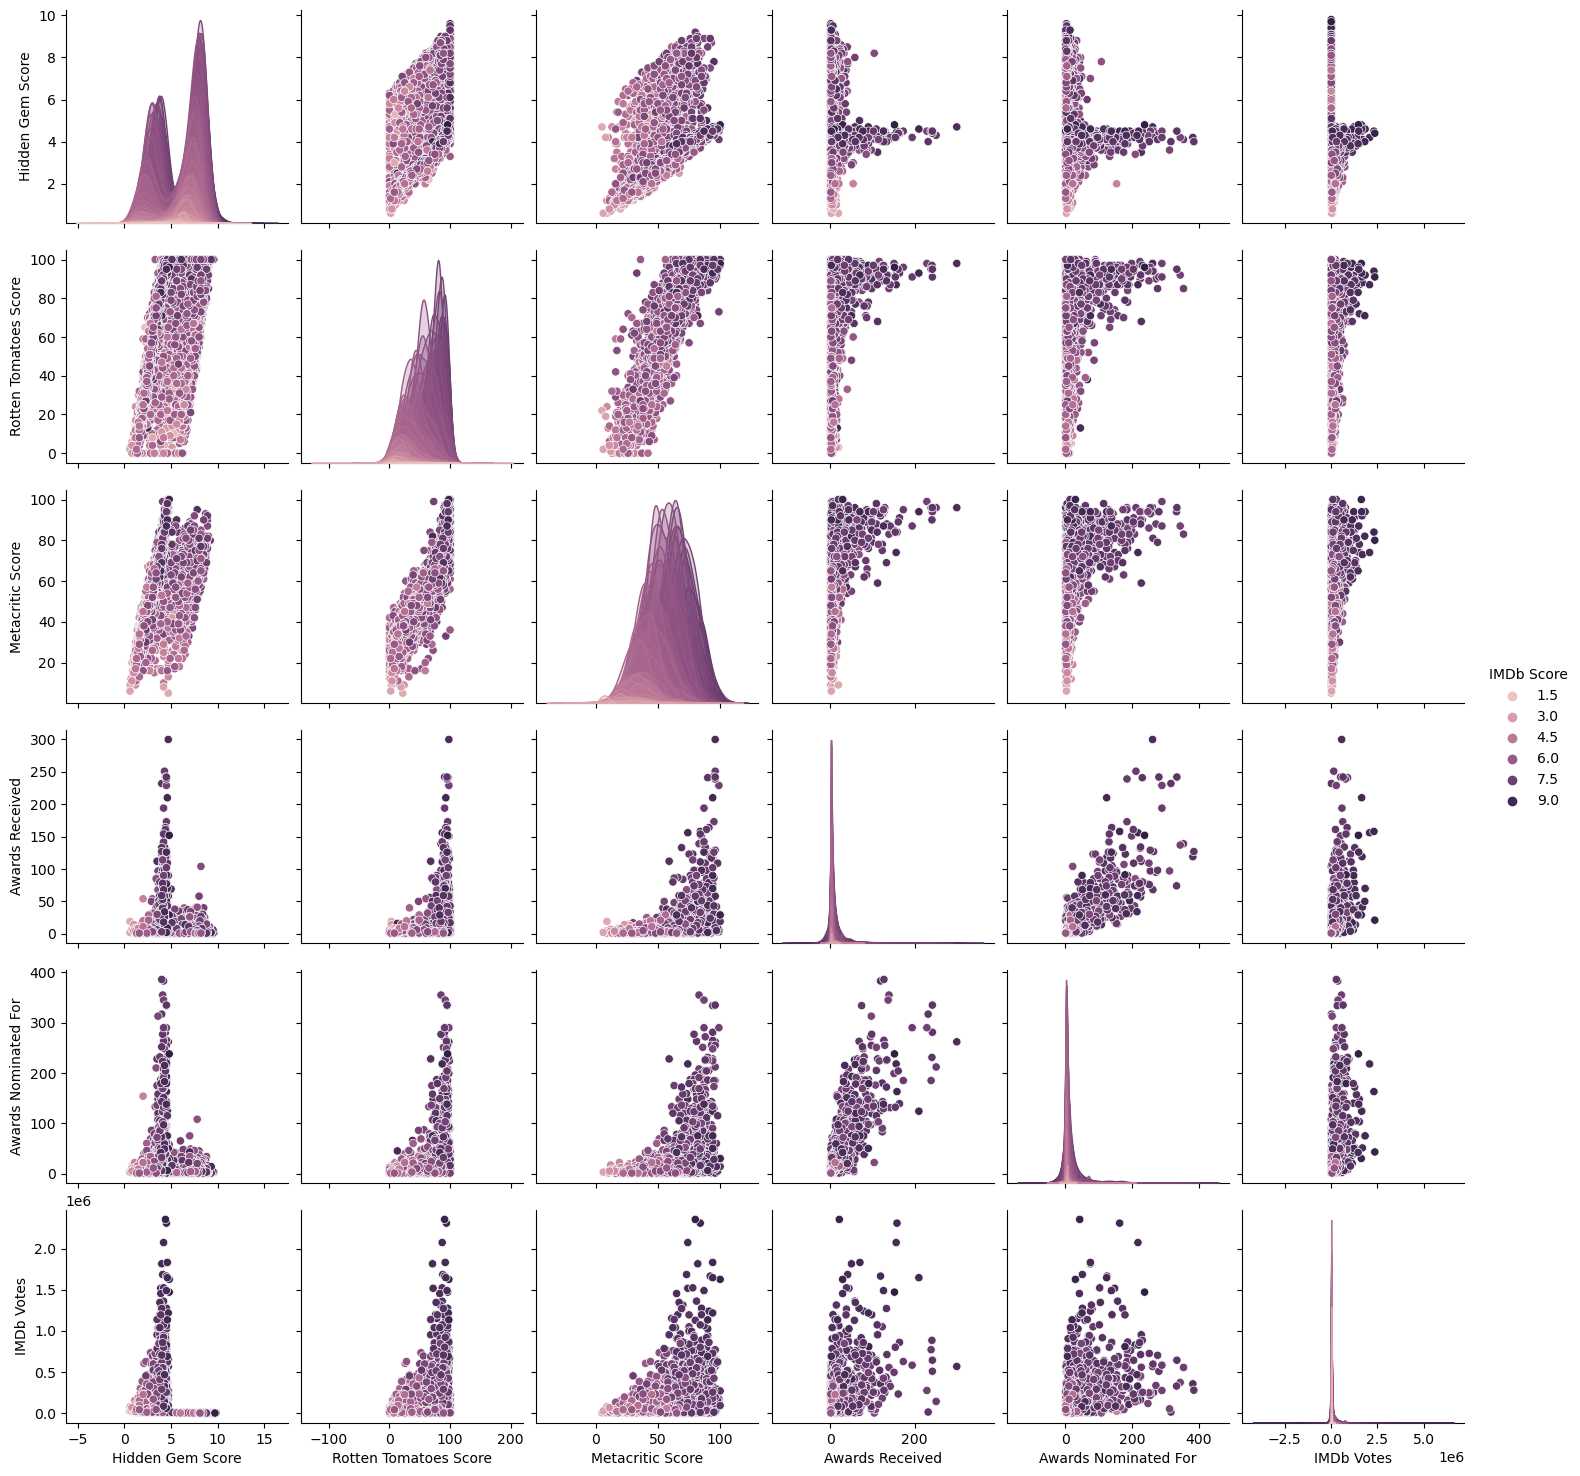

In [32]:
plt.figure(figsize=(15,7))
sns.pairplot(netflix,hue='IMDb Score')
plt.show()

In [33]:
# Select the relevant categorical variables for Correspondence Analysis
selected_variables = ['Genre', 'View Rating']  # Replace with the actual variable names

# Extract the selected variables from the DataFrame
data = netflix[selected_variables]

# Create a contingency table from the data
contingency_table = pd.crosstab(data[selected_variables[0]], data[selected_variables[1]])
contingency_table

View Rating                                         AL  Approved  E  E10+  G  \
Genre                                                                          
Action                                               0         0  0     0  1   
Action, Adventure                                    0         0  0     0  0   
Action, Adventure, Biography, Crime, Fantasy, H...   0         0  0     0  0   
Action, Adventure, Biography, Drama                  0         0  0     0  0   
Action, Adventure, Biography, Drama, History         0         0  0     0  0   
...                                                 ..       ... ..   ... ..   
Thriller                                             0         0  0     0  0   
War                                                  0         0  0     0  0   
War, Drama, Action, Romance                          0         0  0     0  0   
Western                                              0         0  0     0  0   
Western, Adventure                                   0         0  0     0  1   

View Rating                                         GP  M  M/PG  MA-17  NC-17  \
Genre                                                                           
Action                                               0  0     0      0      0   
Action, Adventure                                    0  0     0      0      0   
Action, Adventure, Biography, Crime, Fantasy, H...   0  0     0      0      0   
Action, Adventure, Biography, Drama                  0  0     0      0      0   
Action, Adventure, Biography, Drama, History         0  0     0      0      0   
...                                                 .. ..   ...    ...    ...   
Thriller                                             0  0     0      0      0   
War                                                  0  0     0      0      0   
War, Drama, Action, Romance                          0  0     0      0      0   
Western                                              0  0     0      0      0   
Western, Adventure                                   0  0     0      0      0   

View Rating                                         ...  TV-G  TV-MA  TV-PG  \
Genre                                               ...                       
Action                                              ...     0      0      0   
Action, Adventure                                   ...     0      0      0   
Action, Adventure, Biography, Crime, Fantasy, H...  ...     0      0      0   
Action, Adventure, Biography, Drama                 ...     0      0      0   
Action, Adventure, Biography, Drama, History        ...     0      0      1   
...                                                 ...   ...    ...    ...   
Thriller                                            ...     0      9      0   
War                                                 ...     0      0      0   
War, Drama, Action, Romance                         ...     0      0      0   
Western                                             ...     0      0      0   
Western, Adventure                                  ...     0      0      0   

View Rating                                         TV-Y  TV-Y7  TV-Y7-FV  U  \
Genre                                                                          
Action                                                 0      0         0  0   
Action, Adventure                                      0      0         0  0   
Action, Adventure, Biography, Crime, Fantasy, H...     0      0         0  0   
Action, Adventure, Biography, Drama                    0      0         0  0   
Action, Adventure, Biography, Drama, History           0      0         0  0   
...                                                  ...    ...       ... ..   
Thriller                                               0      0         0  0   
War                                                    0      0         0  0   
War, Drama, Action, Romance                            0      0         0  0 

<a id =MissingValue ><a>
## 3.5 Check and Handle Missing Data 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.
                    Identify and handle missing values in the dataset. Use functions like isnull(), 
    sum(), and dropna() to check for missing values and decide on the appropriate strategy 
    for dealing with them (e.g., imputation, deletion).
</b>
                </font>
            </div>
        </td>
    </tr>
</table>





**Total Independent variable and Dependent variable Type with count in a data**

In [34]:
netflix.dropna().sum()

Title                    JokerIHarrys DaughtersThe ClosetOrdinary Peopl...
Genre                    Crime, Drama, ThrillerAction, Adventure, Fanta...
Tags                     Dark Comedies,Crime Comedies,Dramas,Comedies,C...
Languages                EnglishEnglish, SanskritEnglishFrenchEnglishEn...
Series or Movie          MovieMovieMovieMovieMovieMovieMovieMovieMovieM...
Hidden Gem Score                                                    7147.9
Country Availability     Lithuania,Poland,France,Italy,Spain,Greece,Bel...
Runtime                  1-2 hour1-2 hour1-2 hour1-2 hour1-2 hour1-2 ho...
Director                 Todd PhillipsGeorge LucasDavid YatesFrancis Ve...
Writer                   Scott Silver, Jerry Robinson, Todd Phillips, B...
Actors                   Joaquin Phoenix, Zazie Beetz, Robert De Niro, ...
View Rating              RPGPG-13RRRPGRPG-13RRPG-13PGRPGNot RatedRRNot ...
IMDb Score                                                         14293.6
Rotten Tomatoes Score    

**Total Null value in Dataset** 

In [35]:
netflix.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

**Total percentage of missing value in data**

In [36]:
netflix.isnull().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

<a id= Clean_Data ><a>
## 3.6 Clean and Preprocess the Data

**Drop Unwanted Column From Data they are not relate**


In [37]:
# We have drop those columns because the have no direct pattern with Target and 
# They contain large null so we drop those coloums.
netflix_drop = netflix.drop(['Boxoffice', 'Production House', 'Netflix Link', 'IMDb Link',
        'Poster', 'TMDb Trailer', 'Trailer Site','Image','Metacritic Score'],axis = 1,inplace=True)

**Note:-**
    We Drop the **BoxOffice** because we have 74% of Null value in Data. 
    Also In  a **Production House** we have 66% of Null values.
    Other columns no direct pattern with data or we do'nt want because the 
    the data was inrelevant with target

In [38]:
col_to_drop = ['Writer','Actors','Director','Rotten Tomatoes Score']
drop  = netflix.drop(col_to_drop, axis=1,inplace=True)

**Inference*:-* 
In the data we have less Relevancy,
                          Completeness,
                            Accuracy
And if we drop these columns,It will be more relevant, complete, and accurate. This will make it easier to train a model to predict the rating of a movie so we can drop those columns**

In [39]:
col_to_drop = ['Release Date','Netflix Release Date' ,'Summary']
drop  = netflix.drop(col_to_drop, axis=1,inplace=True)

In [40]:
drop  = netflix.drop(columns=['Languages','Tags','Country Availability'],axis=1,inplace=True)

# in those cols there is high frequency count so we drop it.

### Deal Missing value 

**For Hidden Gem Score we Fill Missing value with Knn Imputer**

In [41]:
from sklearn.impute import KNNImputer

imputation = netflix[['Hidden Gem Score']]
imputation['Hidden Gem Score'] = pd.to_numeric(imputation['Hidden Gem Score'], errors='coerce')


In [42]:
imputer = KNNImputer(n_neighbors=5)  # Replace 5 with your preferred number of neighbors
imputed_values = imputer.fit_transform(imputation)

In [43]:
netflix['Hidden Gem Score'] = imputed_values

In [44]:
print(netflix['Hidden Gem Score'].isna().sum())

0


In [45]:
netflix.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2           Centigrade                         Drama, Thriller   
3                ANNE+                                   Drama   
4                Moxie                 Animation, Short, Drama   

  Series or Movie  Hidden Gem Score       Runtime View Rating  IMDb Score  \
0          Series               4.3  < 30 minutes           R         7.9   
1           Movie               7.0      1-2 hour           R         5.8   
2           Movie               6.4      1-2 hour     Unrated         4.3   
3          Series               7.7  < 30 minutes         NaN         6.5   
4           Movie               8.1      1-2 hour         NaN         6.3   

   Awards Received  Awards Nominated For  IMDb Votes  
0             74.0                  57.0    205926.0  
1              1.0                   NaN      2838.0  
2              NaN                   NaN      1720.0  
3              1.0                   NaN      1147.0  
4              NaN                   4.0        63.0

**for Award Received and Award Nominated we fill Missing Value with Regression Imputation**

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Create a new DataFrame
imputation = netflix[['Awards Received', 'Awards Nominated For']]

# Initialize the IterativeImputer with a LinearRegression model
imputer = IterativeImputer(estimator=LinearRegression(), n_nearest_features=2)


imputed_values = imputer.fit_transform(imputation)

# Replace the missing values in the original DataFrame with the imputed values
netflix['Awards Received'] = imputed_values[:, 0]
netflix['Awards Nominated For'] = imputed_values[:, 1]

# Check if any missing values remain in the columns
print(netflix['Awards Received'].isna().sum())
print(netflix['Awards Nominated For'].isna().sum())


0
0


**Fill Missing Value in IMDb Votes with Knn Imputer**

In [47]:
impute = netflix[['IMDb Votes']]

In [48]:
imputer = KNNImputer(n_neighbors=5)  # Replace 5 with your preferred number of neighbors
imputed_values = imputer.fit_transform(impute)


In [49]:
netflix['IMDb Votes'] = imputed_values

**Fill Missing Value in IMDb Score with Model Based Imputation**

In [50]:
impute = netflix[['IMDb Score']]
imputer = KNNImputer(n_neighbors=5)  # Replace 5 with your preferred number of neighbors
imputed_values = imputer.fit_transform(impute)

In [51]:
impute = netflix[['IMDb Score']]=imputed_values

In [52]:
# In View Rating we can fill with another category is 'Unrated'
netflix['View Rating']= netflix['View Rating'].fillna('Unrated')

In [53]:
# Fill Missing value in Genre with 
netflix['Genre'] = netflix['Genre'].fillna('NA')

In [54]:
netflix.isnull().sum()

Title                   0
Genre                   0
Series or Movie         0
Hidden Gem Score        0
Runtime                 1
View Rating             0
IMDb Score              0
Awards Received         0
Awards Nominated For    0
IMDb Votes              0
dtype: int64

In [55]:
netflix.columns

Index(['Title', 'Genre', 'Series or Movie', 'Hidden Gem Score', 'Runtime',
       'View Rating', 'IMDb Score', 'Awards Received', 'Awards Nominated For',
       'IMDb Votes'],
      dtype='object')

In [56]:
netflix['Runtime'].unique()

array(['< 30 minutes', '1-2 hour', '> 2 hrs', '30-60 mins', nan],
      dtype=object)

In [57]:
netflix['Genre'].unique()

array(['Crime, Drama, Fantasy, Horror, Romance', 'Comedy',
       'Drama, Thriller', ..., 'Action, Animation, Comedy, Romance',
       'Animation, Action, Adventure, Fantasy, Sport, Thriller',
       'Adventure, Drama, Fantasy, Romance, Thriller'], dtype=object)

In [58]:
netflix['View Rating'].unique()

array(['R', 'Unrated', 'PG-13', 'PG', 'TV-14', 'TV-MA', 'TV-Y7',
       'Not Rated', 'Approved', 'G', 'TV-G', 'Passed', 'TV-Y', 'TV-PG',
       'GP', 'MA-17', 'TV-Y7-FV', 'UNRATED', 'M/PG', 'X', 'U', 'M',
       'E10+', 'AL', 'NC-17', 'TV-13', 'NOT RATED', 'E'], dtype=object)

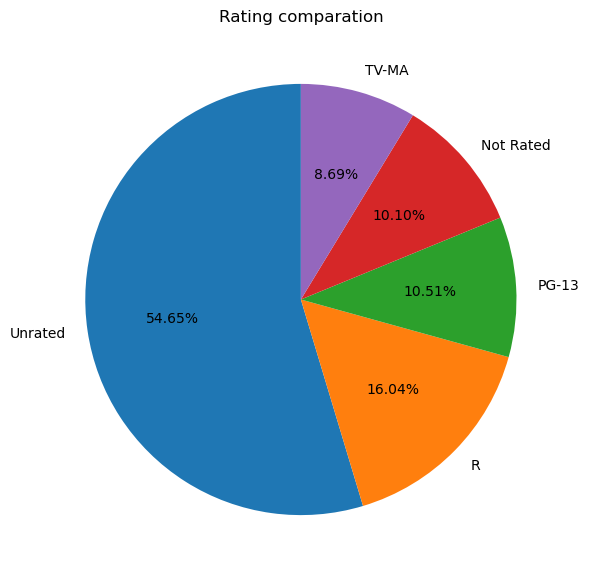

In [59]:
plt.figure(figsize=(7,7))
plt.title("Rating comparation")
plot = plt.pie(netflix['View Rating'].value_counts()[:5],
              labels=netflix['View Rating'].value_counts().index[:5], 
              autopct="%1.2f%%",
              startangle=90)
plt.show()

<a id= outlier ><a>
## 3.7 Outliers

In [60]:
num_cols = netflix.select_dtypes(include=['number'])
num_cols.columns

Index(['Hidden Gem Score', 'IMDb Score', 'Awards Received',
       'Awards Nominated For', 'IMDb Votes'],
      dtype='object')

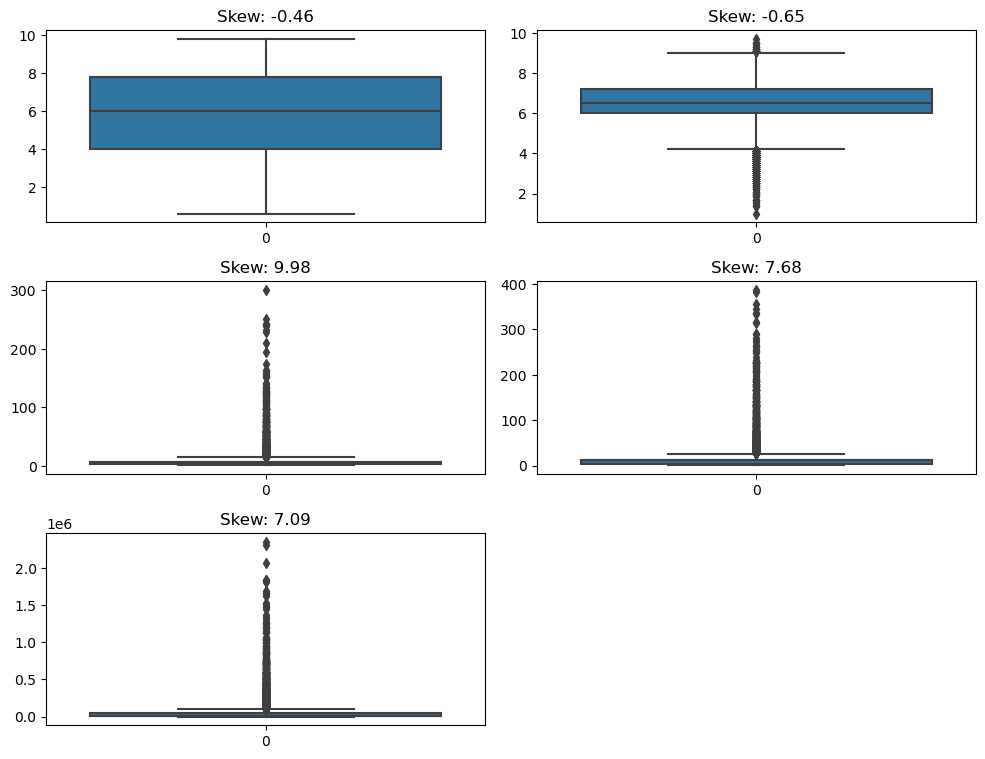

In [61]:
plt.figure(figsize=(10,15))
t=1 
for i in num_cols:
    plt.subplot(6,2,t)
    sns.boxplot(num_cols[i])
    plt.title('Skew: %.2f'%num_cols[i].skew())
    t+=1
plt.tight_layout()
plt.show()

In [62]:
netflix.shape

(15480, 10)

**Treatment the Outliers**

num_cols.info()

In [63]:
for i in num_cols:
    Q1,Q3 = np.quantile(netflix[i],[0.25,0.75])
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    netflix = netflix.loc[~((netflix[i]>UL)|\
             (netflix[i]<LL))]

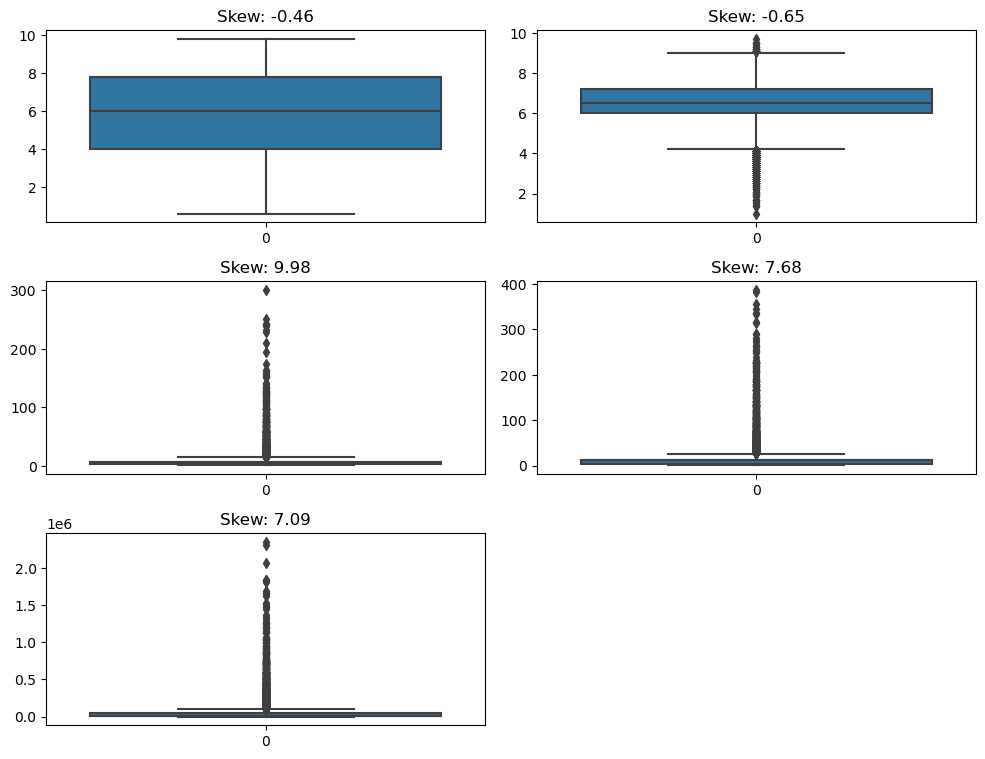

In [64]:
plt.figure(figsize=(10,15))
t=1 
for i in num_cols:
    plt.subplot(6,2,t)
    sns.boxplot(num_cols[i])
    plt.title('Skew: %.2f'%num_cols[i].skew())
    t+=1
plt.tight_layout()
plt.show()

<a id= feature ><a>
## 3.8 Statistical Analysis

<a id=apex><a>
## 4. Best and Worst shows Based On Series And Movies

In [65]:
# All categorial Columns 
cat_cols = netflix.select_dtypes(include=['object']).columns
cat_cols

Index(['Title', 'Genre', 'Series or Movie', 'Runtime', 'View Rating'], dtype='object')

In [66]:
netflix.columns

Index(['Title', 'Genre', 'Series or Movie', 'Hidden Gem Score', 'Runtime',
       'View Rating', 'IMDb Score', 'Awards Received', 'Awards Nominated For',
       'IMDb Votes'],
      dtype='object')

In [67]:
movies = netflix[netflix['Series or Movie']=='Movie']
movies.head(1)

Title   Genre Series or Movie  Hidden Gem Score   Runtime  \
1  HOW TO BUILD A GIRL  Comedy           Movie               7.0  1-2 hour   

  View Rating  IMDb Score  Awards Received  Awards Nominated For  IMDb Votes  
1           R         5.8              1.0              4.439206      2838.0

In [68]:
series = netflix[netflix['Series or Movie']=='Series']
series.head(1)

Title  Genre Series or Movie  Hidden Gem Score       Runtime View Rating  \
3  ANNE+  Drama          Series               7.7  < 30 minutes     Unrated   

   IMDb Score  Awards Received  Awards Nominated For  IMDb Votes  
3         6.5              1.0              4.439206      1147.0

<a id='Series'><a>
# 4.1 Analysis For TV Series Categories

In [69]:
#First of all I create a new series dataframe dropping the missing values contained in the "Genre" column.
series_genre = series.dropna(subset=['Genre']) 

In [70]:
series_genre_list = series_genre.Genre.str.split('|') 

series_list = {} 

#using loop in seperate genre and collect them  

for i in series_genre_list: 
    for j in i: 
        if (j in series_list): 
            series_list[j]+=1 
        else:  
             series_list[j]=1 

In [71]:
series_genre_list.head(30)

3                                                [Drama]
6                                                [Drama]
23                           [Animation, Action, Comedy]
25                                        [Crime, Drama]
26                                       [Drama, Sci-Fi]
45                                       [Drama, Sci-Fi]
46                                               [Drama]
53                                               [Drama]
54                                     [Comedy, Romance]
94             [Adventure, Comedy, Drama, Thriller, War]
105                                [Drama, History, War]
106        [Animation, Action, Adventure, Drama, Sci-Fi]
112                           [Animation, Comedy, Drama]
114                                              [Drama]
125                                   [Animation, Short]
127                                       [Short, Drama]
137                                              [Drama]
146                            

**Plot Top 10 Series Category**

In [72]:
# Data  Frame 
series_top = pd.DataFrame(series_list.values(),
                        index =series_list.keys(),
                        columns = ['Total Genres in Tv Series']) # type: ignore 

In [73]:
# Arrange in the Accending Order for for Top categories

series_top.sort_values(by='Total Genres in Tv Series',ascending=False,inplace=True)

In [74]:
Top_10_series = series_top[:10]
Top_10_series

Total Genres in Tv Series
NA                                            527
Drama                                         206
Comedy                                        185
Documentary                                   133
Reality-TV                                     96
Drama, Romance                                 74
Animation                                      71
Comedy, Drama                                  62
Comedy, Romance                                55
Comedy, Drama, Romance                         53

In [75]:
Top_10_show = netflix.sort_values(by=['IMDb Score'],ascending=False)
Top_10_show.iloc[:10,[0,1]]

Title  \
1336   David Attenborough: A Life on Our Planet   
1818                                 Green Gold   
13736       The Twilight Zone (Original Series)   
430                                 Running Man   
11405                                  Humsafar   
9836                                   Stranger   
3260                               Numberblocks   
3276                             Bye Bye London   
13156             Raja Rasoi Aur Anya Kahaniyan   
14221                 Apocalypse - World War II   

                                                   Genre  
1336                              Documentary, Biography  
1818                                  Documentary, Short  
13736  Drama, Fantasy, Horror, Mystery, Sci-Fi, Thriller  
430                        Comedy, Game-Show, Reality-TV  
11405                                     Drama, Romance  
9836                           Documentary, Drama, Sport  
3260                                           Animation  
3276                                       Comedy, Drama  
13156                                            History  
14221                          Documentary, History, War

**Top 10 Series Category in Genres**

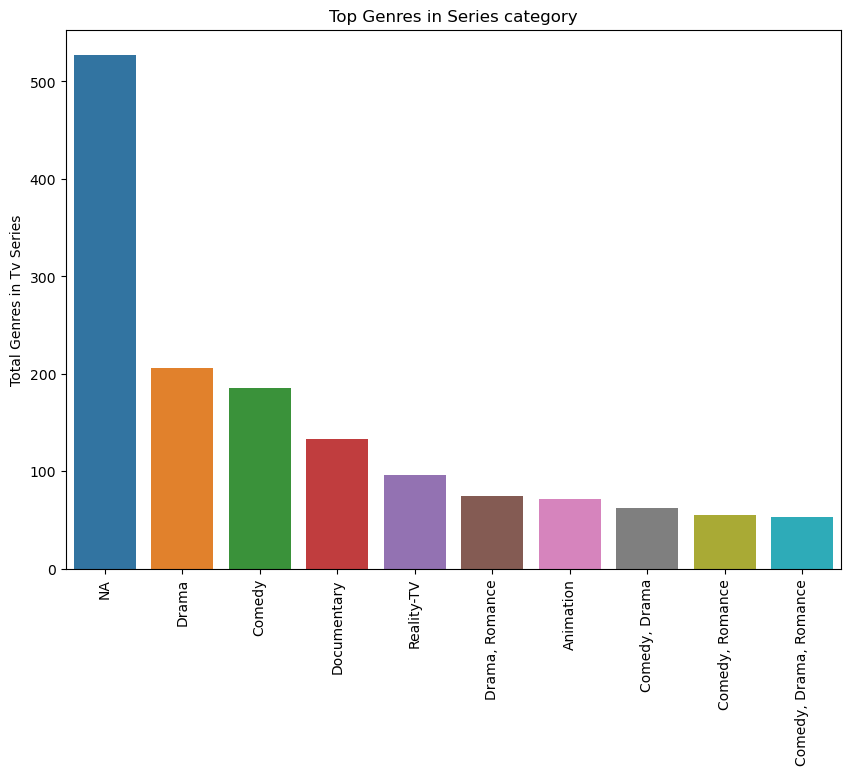

In [76]:
plt.figure(figsize = (10,7))
sns.barplot( x = Top_10_series.index,y = Top_10_series['Total Genres in Tv Series'])
plt.title("Top Genres in Series category")
plt.xticks(rotation=90)
plt.show()

<a id='Movies'><a>
# 4.2 Analysis For Movies Categories

In [77]:
movies['Genre'].unique()

array(['Comedy', 'Drama, Thriller', 'Animation, Short, Drama', ...,
       'Documentary, Biography, News',
       'Animation, Action, Adventure, Fantasy, Thriller',
       'Action, Animation, Comedy, Romance'], dtype=object)

In [78]:
movie_genre = movies.dropna(subset=['Genre']) 

In [79]:
movie_genre_list = movie_genre.Genre.str.split('|') 


In [80]:
movie_list = {} 

#using loop in seperate genre and collect them  

for i in movie_genre_list: 
    for j in i: 
        if (j in movie_list): 
            movie_list[j]+=1 
        else:  
             movie_list[j]=1 

In [81]:
movie_new = pd.DataFrame(movie_list.values(),
                         index = movie_list.keys(),
                         columns = ['Total Genres in Movies'])  # type: ignore

In [82]:
movie_new.sort_values(by = 'Total Genres in Movies',ascending = False,inplace = True) 

In [83]:
Top_10_movie_genre = movie_new[0:10] 
Top_10_movie_genre

Total Genres in Movies
NA                                                1181
Comedy                                             841
Drama                                              687
Comedy, Drama                                      317
Comedy, Romance                                    307
Documentary                                        307
Drama, Romance                                     288
Comedy, Drama, Romance                             247
Action, Crime, Thriller                            114
Action, Crime, Drama, Thriller                     106

**Top 10 Movies Categories based on Genres**

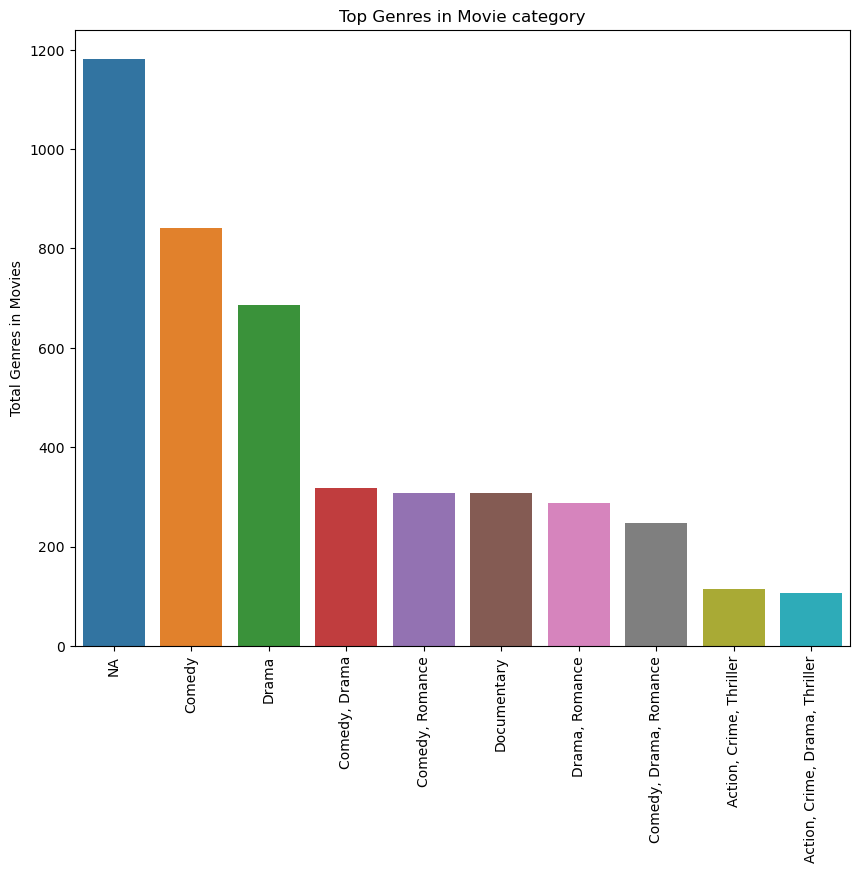

In [84]:
plt.figure(figsize=(10,8))
sns.barplot( x = Top_10_movie_genre.index, y = Top_10_movie_genre['Total Genres in Movies'])
plt.title("Top Genres in Movie category")
plt.xticks(rotation=90)
plt.show()

**Top 10 movies Based On IMDb Score**

In [85]:
imdb = movies.sort_values(by='IMDb Score',ascending=False)
Top_10_movies_imdb = imdb[:10]

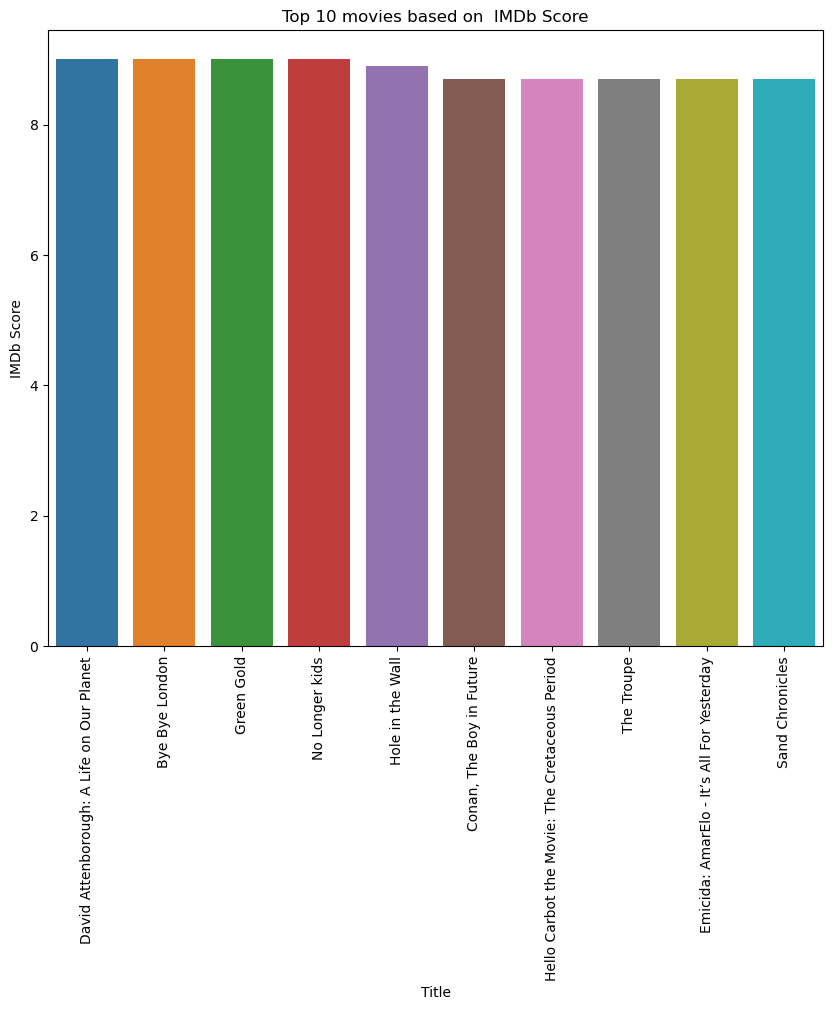

In [86]:
plt.figure(figsize=(10,8))
plt.title("Top 10 movies based on  IMDb Score")
plt.xticks(rotation = 90)
sns.barplot(x = Top_10_movies_imdb['Title'] , y = Top_10_movies_imdb['IMDb Score'])
plt.show()

**Top 10 Series based On IMDb Score**

In [87]:
imdb_series = series.sort_values(by='IMDb Score',ascending=False)
Top_10_series_imdb =imdb_series[:10]

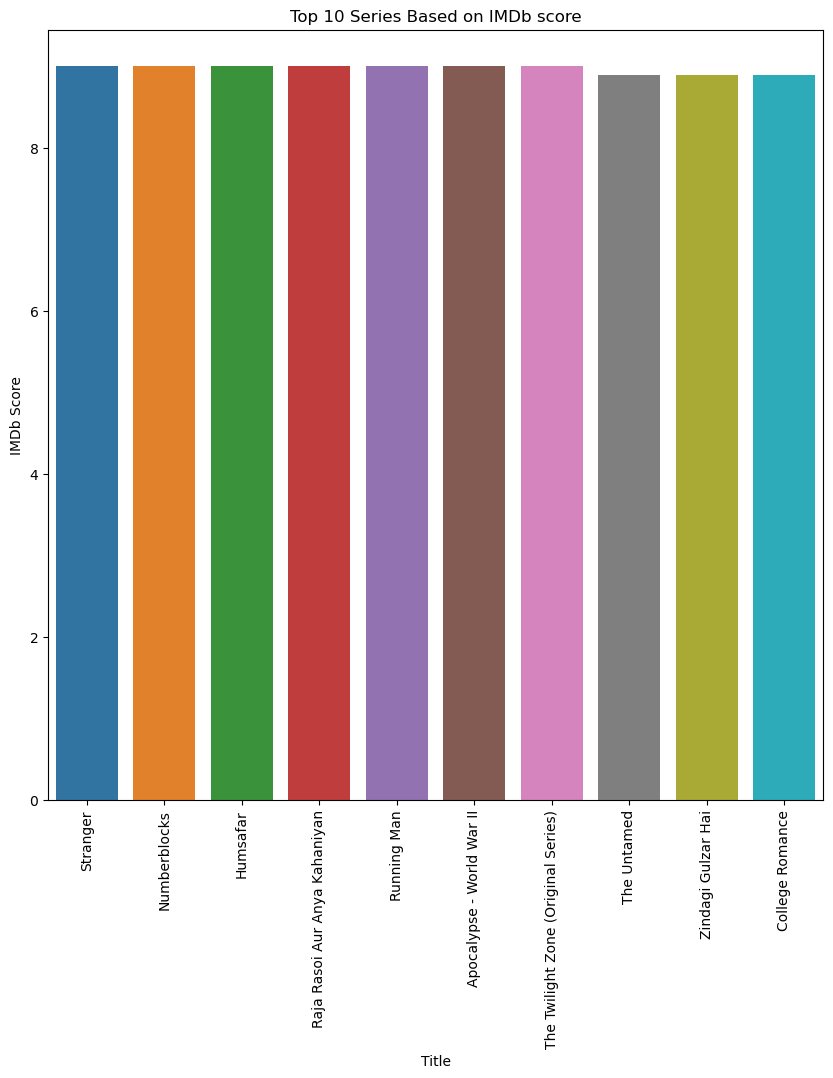

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(x=Top_10_series_imdb['Title'],y=Top_10_series_imdb['IMDb Score'])
plt.xticks(rotation=90)
plt.title('Top 10 Series Based on IMDb score')
plt.show()

**Lowest 10 Series based On IMDb Score**

In [89]:
imdb_series = series.sort_values(by='IMDb Score',ascending=True)
Top_10_series_imdb_bottom =imdb_series[:10]
Top_10_series_imdb_bottom.head()

Title                   Genre Series or Movie  Hidden Gem Score  \
5665         Flinch               Game-Show          Series               6.8   
9924     Yanik Koza                   Drama          Series               7.0   
4876    Team Kaylie                  Comedy          Series               7.0   
10317  Legend Quest              Reality-TV          Series               7.0   
2095      Twogether  Comedy, Drama, Romance          Series               7.0   

            Runtime View Rating  IMDb Score  Awards Received  \
5665   < 30 minutes     Unrated         4.2         1.000000   
9924   < 30 minutes     Unrated         4.2         6.924647   
4876   < 30 minutes       TV-PG         4.2         6.924647   
10317  < 30 minutes     Unrated         4.2         6.924647   
2095   < 30 minutes           R         4.2         6.924647   

       Awards Nominated For  IMDb Votes  
5665               4.439206       619.0  
9924              13.276239       166.0  
4876              13.276239       222.0  
10317             13.276239       193.0  
2095              13.276239       163.0

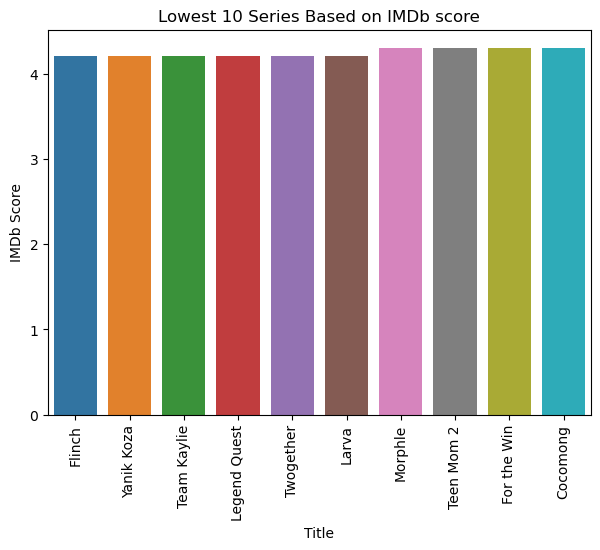

In [90]:
# 
plt.figure(figsize=(7,5))
sns.barplot(x=Top_10_series_imdb_bottom['Title'],y=Top_10_series_imdb_bottom['IMDb Score'])
plt.xticks(rotation=90)
plt.title('Lowest 10 Series Based on IMDb score')
plt.show()

In [91]:
title_series = series.sort_values(by='Title',ascending=True)
title_series.value_counts().sum()

3476

In [92]:
title_movies = movies.sort_values(by='Title',ascending=True)
title_movies.value_counts().sum()

9539

In [93]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13016 entries, 1 to 15479
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 13016 non-null  object 
 1   Genre                 13016 non-null  object 
 2   Series or Movie       13016 non-null  object 
 3   Hidden Gem Score      13016 non-null  float64
 4   Runtime               13015 non-null  object 
 5   View Rating           13016 non-null  object 
 6   IMDb Score            13016 non-null  float64
 7   Awards Received       13016 non-null  float64
 8   Awards Nominated For  13016 non-null  float64
 9   IMDb Votes            13016 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.1+ MB


In [94]:
netflix['Title'].value_counts()

Kingdom                                     4
Déjà Vu                                     3
Oh My Ghost                                 3
Love                                        3
Only You                                    3
                                           ..
RV: Resurrected Victims                     1
Clara                                       1
Five Feet Apart                             1
Sinister Circle                             1
DreamWorks Kung Fu Panda Awesome Secrets    1
Name: Title, Length: 12746, dtype: int64

<a id=selection><a>
## 5. Data Preprocessing Feature Selection

### One Hot Encoding For Genre

In [95]:
netflix_genres = netflix['Genre'].str.get_dummies(sep=',')

# Get the unique genre categories
unique_genres = netflix['Genre'].str.split(',', expand=True).stack().unique()

# Rename the newly created columns based on unique genre categories
netflix_genres.columns = ['Genre_' + genre.strip() for genre in unique_genres]

# Print the resulting DataFrame
print(netflix_genres.head())

   Genre_Comedy  Genre_Drama  Genre_Thriller  Genre_Animation  Genre_Short  \
1             0            0               0                0            0   
2             0            0               0                0            0   
3             0            0               0                0            0   
4             0            0               0                0            0   
5             0            0               0                0            0   

   Genre_Drama  Genre_Romance  Genre_Family  Genre_Fantasy  Genre_Crime  ...  \
1            0              0             0              0            0  ...   
2            0              0             0              0            0  ...   
3            0              0             0              0            0  ...   
4            0              0             1              0            0  ...   
5            0              0             0              0            0  ...   

   Genre_News  Genre_Talk-Show  Genre_Documentary 

In [96]:
# Update Unique category of genres in Data because we have a repeated category in a genre 
column_indices = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 14, 16, 18, 19, 20, 21, 22, 23, 26, 29, 31, 34, 37, 41, 43, 46, 47, 51]
netflix_updated_col = netflix_genres.iloc[:,column_indices]
netflix_updated_col  

Genre_Comedy  Genre_Drama  Genre_Thriller  Genre_Animation  \
1                 0            0               0                0   
2                 0            0               0                0   
3                 0            0               0                0   
4                 0            0               0                0   
5                 0            0               0                0   
...             ...          ...             ...              ...   
15475             0            0               0                0   
15476             0            0               0                0   
15477             0            0               0                0   
15478             0            0               0                0   
15479             1            0               0                0   

       Genre_Short  Genre_Romance  Genre_Family  Genre_Fantasy  Genre_Crime  \
1                0              0             0              0            0   
2                0              0             0              0            0   
3                0              0             0              0            0   
4                0              0             1              0            0   
5                0              0             0              0            0   
...            ...            ...           ...            ...          ...   
15475            0              0             0              0            0   
15476            0              0             0              0            0   
15477            1              0             0              1            0   
15478            1              0             0              1            0   
15479            1              0             0              1            0   

       Genre_Mystery  ...  Genre_Documentary  Genre_Horror  Genre_Film-Noir  \
1                  0  ...                  0             0                0   
2                  0  ...                  0             0                0   
3                  0  ...                  0             0                0   
4                  0  ...                  0             0                0   
5                  0  ...                  0             0                0   
...              ...  ...                ...           ...              ...   
15475              0  ...                  0             0                0   
15476              0  ...                  0             0                0   
15477              0  ...                  0             0                0   
15478              0  ...                  0             0                0   
15479              0  ...                  0             0                0   

       Genre_Musical  Genre_Western  Genre_Reality-TV  Genre_Game-Show  \
1                  0              0                 0                0   
2                  0              0                 0                0   
3                  0              0                 0                0   
4                  0              0                 0                0   
5                  0              0                 0                0   
...              ...            ...               ...              ...   
15475              0              0                 0                0   
15476              0              0                 0                0   
15477              0              0                 0                0   
15478              0              0                 0                0   
15479              0              0                 0                0   

       Genre_News  Genre_Talk-Show  Genre_Adult  
1               0                0            0  
2               0                0            0  
3               0                0            0  
4               0                0            0  
5               0                0            0  
...           ...              ...          ...  
15475           0                0       

In [97]:
netflix_new = pd.concat([netflix,netflix_updated_col], axis=1)
netflix_new

Title  \
1                            HOW TO BUILD A GIRL   
2                                     Centigrade   
3                                          ANNE+   
4                                          Moxie   
5                               The Con-Heartist   
...                                          ...   
15475                     K-POP Extreme Survival   
15476            DreamWorks Shreks Swamp Stories   
15477  DreamWorks Happy Holidays from Madagascar   
15478                DreamWorks Holiday Classics   
15479   DreamWorks Kung Fu Panda Awesome Secrets   

                                   Genre Series or Movie  Hidden Gem Score  \
1                                 Comedy           Movie          7.000000   
2                        Drama, Thriller           Movie          6.400000   
3                                  Drama          Series          7.700000   
4                Animation, Short, Drama           Movie          8.100000   
5                        Comedy, Romance           Movie          8.600000   
...                                  ...             ...               ...   
15475                                 NA          Series          5.937551   
15476                                 NA          Series          5.937551   
15477          Animation, Comedy, Family          Series          8.400000   
15478          Animation, Comedy, Family          Series          8.200000   
15479  Animation, Action, Comedy, Family          Series          8.100000   

            Runtime View Rating  IMDb Score  Awards Received  \
1          1-2 hour           R    5.800000         1.000000   
2          1-2 hour     Unrated    4.300000         6.924647   
3      < 30 minutes     Unrated    6.500000         1.000000   
4          1-2 hour     Unrated    6.300000         2.659453   
5           > 2 hrs     Unrated    7.400000         6.924647   
...             ...         ...         ...              ...   
15475  < 30 minutes     Unrated    6.496054         6.924647   
15476  < 30 minutes     Unrated    6.496054         6.924647   
15477  < 30 minutes     Unrated    6.800000         6.924647   
15478  < 30 minutes     Unrated    6.400000         6.924647   
15479  < 30 minutes       TV-PG    6.200000         6.924647   

       Awards Nominated For    IMDb Votes  ...  Genre_Documentary  \
1                  4.439206   2838.000000  ...                  0   
2                 13.276239   1720.000000  ...                  0   
3                  4.439206   1147.000000  ...                  0   
4                  4.000000     63.000000  ...                  0   
5                 13.276239    131.000000  ...                  0   
...                     ...           ...  ...                ...   
15475             13.276239  42728.411615  ...                  0   
15476             13.276239  42728.411615  ...                  0   
15477             13.276239     71.000000  ...                  0   
15478             13.276239     82.000000  ...                  0   
15479             13.276239     17.000000  ...                  0   

       Genre_Horror  Genre_Film-Noir  Genre_Musical  Genre_Western  \
1                 0                0              0              0   
2                 0                0              0              0   
3                 0                0              0              0   
4                 0                0              0              0   
5                 0                0              0              0   
...             ...              ...            ...            ...   
15475             0                0              0              0   
15476             0                0              0              0   
15477             0                0              0              0   
15478             0                0              0              0   
15479             0                0              0              0   

       Genre_Reality-TV  Genre_Game-Show  

In [98]:
netflix_new.drop(columns=['Genre'],axis=1,inplace=True)

**Label Encoding For View Rating**

In [99]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "View Rating" column
netflix_new['View Rating netflix_new'] = label_encoder.fit_transform(netflix_new['View Rating'])
netflix_new.drop('View Rating', axis=1, inplace=True)

# Check the resulting DataFrame
print(netflix_new[['View Rating netflix_new']].head())

   View Rating netflix_new
1                       14
2                       24
3                       24
4                       24
5                       24


In [100]:
netflix_new.head()

Title Series or Movie  Hidden Gem Score       Runtime  \
1  HOW TO BUILD A GIRL           Movie               7.0      1-2 hour   
2           Centigrade           Movie               6.4      1-2 hour   
3                ANNE+          Series               7.7  < 30 minutes   
4                Moxie           Movie               8.1      1-2 hour   
5     The Con-Heartist           Movie               8.6       > 2 hrs   

   IMDb Score  Awards Received  Awards Nominated For  IMDb Votes  \
1         5.8         1.000000              4.439206      2838.0   
2         4.3         6.924647             13.276239      1720.0   
3         6.5         1.000000              4.439206      1147.0   
4         6.3         2.659453              4.000000        63.0   
5         7.4         6.924647             13.276239       131.0   

   Genre_Comedy  Genre_Drama  ...  Genre_Horror  Genre_Film-Noir  \
1             0            0  ...             0                0   
2             0            0  ...             0                0   
3             0            0  ...             0                0   
4             0            0  ...             0                0   
5             0            0  ...             0                0   

   Genre_Musical  Genre_Western  Genre_Reality-TV  Genre_Game-Show  \
1              0              0                 0                0   
2              0              0                 0                0   
3              0              0                 0                0   
4              0              0                 0                0   
5              0              0                 0                0   

   Genre_News  Genre_Talk-Show  Genre_Adult  View Rating netflix_new  
1           0                0            0                       14  
2           0                0            0                       24  
3           0                0            0                       24  
4           0                0            0                       24  
5           0                0            0                       24  

[5 rows x 38 columns]

**One Hot Encoding for Series or Movies**

In [101]:
encoded = pd.get_dummies(netflix['Series or Movie'])

# Concatenate the original DataFrame with the one-hot encoded columns
netflix_new = pd.concat([netflix_new,encoded], axis=1)

# Drop the original "Genre" column
netflix_new.drop('Series or Movie', axis=1, inplace=True)

# Check the resulting DataFrame
netflix_new.head()

Title  Hidden Gem Score       Runtime  IMDb Score  \
1  HOW TO BUILD A GIRL               7.0      1-2 hour         5.8   
2           Centigrade               6.4      1-2 hour         4.3   
3                ANNE+               7.7  < 30 minutes         6.5   
4                Moxie               8.1      1-2 hour         6.3   
5     The Con-Heartist               8.6       > 2 hrs         7.4   

   Awards Received  Awards Nominated For  IMDb Votes  Genre_Comedy  \
1         1.000000              4.439206      2838.0             0   
2         6.924647             13.276239      1720.0             0   
3         1.000000              4.439206      1147.0             0   
4         2.659453              4.000000        63.0             0   
5         6.924647             13.276239       131.0             0   

   Genre_Drama  Genre_Thriller  ...  Genre_Musical  Genre_Western  \
1            0               0  ...              0              0   
2            0               0  ...              0              0   
3            0               0  ...              0              0   
4            0               0  ...              0              0   
5            0               0  ...              0              0   

   Genre_Reality-TV  Genre_Game-Show  Genre_News  Genre_Talk-Show  \
1                 0                0           0                0   
2                 0                0           0                0   
3                 0                0           0                0   
4                 0                0           0                0   
5                 0                0           0                0   

   Genre_Adult  View Rating netflix_new  Movie  Series  
1            0                       14      1       0  
2            0                       24      1       0  
3            0                       24      0       1  
4            0                       24      1       0  
5            0                       24      1       0  

[5 rows x 39 columns]

**one Hot Encoding**

In [102]:
encoded_runtime = pd.get_dummies(netflix_new['Runtime'])

In [103]:
encoded_runtime.head()

1-2 hour  30-60 mins  < 30 minutes  > 2 hrs
1         1           0             0        0
2         1           0             0        0
3         0           0             1        0
4         1           0             0        0
5         0           0             0        1

In [104]:
encoded_runtime = encoded_runtime.rename(columns={
    '1-2 hour': '1-2 hours',
    '30-60 mins': '30-60 minutes',
    '< 30 minutes': '0-30 minutes',
    '> 2 hrs': '0-2 hours'
})


In [105]:
encoded_runtime.drop(encoded_runtime.columns[-1], axis=1, inplace=True)

In [106]:
netflix_new.drop(columns=['Runtime'],axis=1,inplace=True)

In [107]:
netflix_new = pd.concat([netflix_new,encoded_runtime], axis=1)
netflix_new.head()

Title  Hidden Gem Score  IMDb Score  Awards Received  \
1  HOW TO BUILD A GIRL               7.0         5.8         1.000000   
2           Centigrade               6.4         4.3         6.924647   
3                ANNE+               7.7         6.5         1.000000   
4                Moxie               8.1         6.3         2.659453   
5     The Con-Heartist               8.6         7.4         6.924647   

   Awards Nominated For  IMDb Votes  Genre_Comedy  Genre_Drama  \
1              4.439206      2838.0             0            0   
2             13.276239      1720.0             0            0   
3              4.439206      1147.0             0            0   
4              4.000000        63.0             0            0   
5             13.276239       131.0             0            0   

   Genre_Thriller  Genre_Animation  ...  Genre_Game-Show  Genre_News  \
1               0                0  ...                0           0   
2               0                0  ...                0           0   
3               0                0  ...                0           0   
4               0                0  ...                0           0   
5               0                0  ...                0           0   

   Genre_Talk-Show  Genre_Adult  View Rating netflix_new  Movie  Series  \
1                0            0                       14      1       0   
2                0            0                       24      1       0   
3                0            0                       24      0       1   
4                0            0                       24      1       0   
5                0            0                       24      1       0   

   1-2 hours  30-60 minutes  0-30 minutes  
1          1              0             0  
2          1              0             0  
3          0              0             1  
4          1              0             0  
5          0              0             0  

[5 rows x 41 columns]

**Frequency_encoding for Title**

In [108]:
# Perform frequency encoding on the "Title" column
title_frequency = netflix_new['Title'].value_counts(normalize=True)

In [109]:
netflix_new['Title Frequency'] = netflix_new['Title'].map(title_frequency)

# Check the resulting DataFrame
print(netflix_new[['Title', 'Title Frequency']].head())

                 Title  Title Frequency
1  HOW TO BUILD A GIRL         0.000077
2           Centigrade         0.000077
3                ANNE+         0.000077
4                Moxie         0.000077
5     The Con-Heartist         0.000077


In [110]:
netflix_new.drop(columns=['Title'],axis=1,inplace=True)

In [111]:
netflix_new.head()

Hidden Gem Score  IMDb Score  Awards Received  Awards Nominated For  \
1               7.0         5.8         1.000000              4.439206   
2               6.4         4.3         6.924647             13.276239   
3               7.7         6.5         1.000000              4.439206   
4               8.1         6.3         2.659453              4.000000   
5               8.6         7.4         6.924647             13.276239   

   IMDb Votes  Genre_Comedy  Genre_Drama  Genre_Thriller  Genre_Animation  \
1      2838.0             0            0               0                0   
2      1720.0             0            0               0                0   
3      1147.0             0            0               0                0   
4        63.0             0            0               0                0   
5       131.0             0            0               0                0   

   Genre_Short  ...  Genre_News  Genre_Talk-Show  Genre_Adult  \
1            0  ...           0                0            0   
2            0  ...           0                0            0   
3            0  ...           0                0            0   
4            0  ...           0                0            0   
5            0  ...           0                0            0   

   View Rating netflix_new  Movie  Series  1-2 hours  30-60 minutes  \
1                       14      1       0          1              0   
2                       24      1       0          1              0   
3                       24      0       1          0              0   
4                       24      1       0          1              0   
5                       24      1       0          0              0   

   0-30 minutes  Title Frequency  
1             0         0.000077  
2             0         0.000077  
3             1         0.000077  
4             0         0.000077  
5             0         0.000077  

[5 rows x 41 columns]

### Train Test Split

In [112]:
netflix_new.corr()

Hidden Gem Score  IMDb Score  Awards Received  \
Hidden Gem Score                 1.000000    0.231623         0.174192   
IMDb Score                       0.231623    1.000000         0.025670   
Awards Received                  0.174192    0.025670         1.000000   
Awards Nominated For             0.133065    0.004837         0.810807   
IMDb Votes                      -0.634870    0.006694         0.032992   
Genre_Comedy                     0.069133    0.131633        -0.003622   
Genre_Drama                     -0.048899    0.013316        -0.074769   
Genre_Thriller                   0.029280    0.036527         0.023555   
Genre_Animation                  0.010265    0.075101        -0.033977   
Genre_Short                     -0.006806    0.041785        -0.056019   
Genre_Romance                    0.005185    0.001443        -0.004640   
Genre_Family                    -0.143441    0.087728        -0.137357   
Genre_Fantasy                    0.004507   -0.049295        -0.070318   
Genre_Crime                     -0.036844    0.056084        -0.075009   
Genre_Mystery                    0.007525    0.002005         0.006265   
Genre_Music                     -0.000174    0.084435        -0.033801   
Genre_Action                    -0.001320    0.034945        -0.027441   
Genre_Sci-Fi                    -0.137030   -0.000844        -0.078225   
Genre_Biography                  0.041560    0.036347         0.019845   
Genre_Sport                     -0.045763    0.034743        -0.093475   
Genre_NA                        -0.090604    0.003381        -0.063138   
Genre_Adventure                  0.072939    0.014331         0.011813   
Genre_War                       -0.003526    0.040375        -0.013174   
Genre_History                    0.021261    0.031527         0.019115   
Genre_Documentary               -0.055501    0.002643        -0.024947   
Genre_Horror                    -0.062663   -0.059132        -0.049368   
Genre_Film-Noir                 -0.097356    0.033063        -0.066172   
Genre_Musical                    0.177813    0.186959         0.019473   
Genre_Western                   -0.006279   -0.030552        -0.017134   
Genre_Reality-TV                -0.098876   -0.150002        -0.033090   
Genre_Game-Show                  0.019876   -0.013611         0.009730   
Genre_News                       0.010151    0.007801         0.006265   
Genre_Talk-Show                  0.059260    0.008440         0.041767   
Genre_Adult                      0.022556   -0.005573         0.013778   
View Rating netflix_new          0.486017    0.067062         0.229142   
Movie                           -0.211004   -0.331281        -0.071401   
Series                           0.211004    0.331281         0.071401   
1-2 hours                       -0.198554   -0.334757        -0.086799   
30-60 minutes                    0.077431    0.012474         0.071870   
0-30 minutes                     0.214075    0.327295         0.081497   
Title Frequency                 -0.061783    0.019167        -0.036378   

                         Awards Nominated For  IMDb Votes  Genre_Comedy  \
Hidden Gem Score                     0.133065   -0.634870      0.069133   
IMDb Score                           0.004837    0.006694      0.131633   
Awards Received                      0.810807    0.032992     -0.003622   
Awards Nominated For                 1.000000    0.079383      0.002583   
IMDb Votes                           0.079383    1.000000     -0.087174   
Genre_Comedy                         0.002583   -0.087174      1.000000   
Genre_Drama                         -0.058431   -0.016277      0.345717   
Genre_Thriller                       0.010950   -0.018344     -0.007672   
Genre_Animation                     -0.037001   -0.019903     -0.024778   
Genre_Short                         -0.049123   -0.048663      0.243831   
Genre_Romance                       -0.001279    0.003343     -0.002711   
Genre_Family    

In [113]:
X = netflix_new.drop('IMDb Score',axis=1)
y = netflix_new['IMDb Score']

In [114]:
netflix_new.head()

Hidden Gem Score  IMDb Score  Awards Received  Awards Nominated For  \
1               7.0         5.8         1.000000              4.439206   
2               6.4         4.3         6.924647             13.276239   
3               7.7         6.5         1.000000              4.439206   
4               8.1         6.3         2.659453              4.000000   
5               8.6         7.4         6.924647             13.276239   

   IMDb Votes  Genre_Comedy  Genre_Drama  Genre_Thriller  Genre_Animation  \
1      2838.0             0            0               0                0   
2      1720.0             0            0               0                0   
3      1147.0             0            0               0                0   
4        63.0             0            0               0                0   
5       131.0             0            0               0                0   

   Genre_Short  ...  Genre_News  Genre_Talk-Show  Genre_Adult  \
1            0  ...           0                0            0   
2            0  ...           0                0            0   
3            0  ...           0                0            0   
4            0  ...           0                0            0   
5            0  ...           0                0            0   

   View Rating netflix_new  Movie  Series  1-2 hours  30-60 minutes  \
1                       14      1       0          1              0   
2                       24      1       0          1              0   
3                       24      0       1          0              0   
4                       24      1       0          1              0   
5                       24      1       0          0              0   

   0-30 minutes  Title Frequency  
1             0         0.000077  
2             0         0.000077  
3             1         0.000077  
4             0         0.000077  
5             0         0.000077  

[5 rows x 41 columns]

<a id=prediction><a>
## 6. Model Prediction

<a id=base><a>
## 6.1 Base Model 

In [115]:
import statsmodels.api as sm

# Add a constant term to the independent variable array
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             IMDb Score   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:35:51   Log-Likelihood:                -15028.
No. Observations:               13016   AIC:                         3.014e+04
Df Residuals:                   12976   BIC:                         3.043e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<a id=linear><a>
## 6.2 Linear Model

In [116]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [117]:
# Scale the data
sc = StandardScaler()
model = sc.fit_transform(X_train)
y_pred = model.predict(y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lm = LinearRegression()

# Train the model
lm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

<a id=decision><a>
## 6.3 Decision Tree Model

In [ ]:
# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

**GridSearch**

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, 
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
dtree = DecisionTreeRegressor(random_state=0, 
                              max_depth=8, 
                              max_features='auto', 
                              min_samples_leaf=1, 
                              min_samples_split=8)
dtree.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

The decision tree model has some predictive power, as evidenced by the relatively low MAE, MAPE, and MSE values compared to the range of the target variable.
The R2 score of 0.701 indicates that the model explains a substantial portion of the variation in the target variable, but there might be other factors or features that could further enhance the model's performance.
The RMSE value of 0.506 suggests that, on average, the model's predictions deviate by approximately 0.506 units from the actual values.

**Random Forest Regression**

In [ ]:
from sklearn.metrics import mean_squared_error,f1_score
# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {}'.format(rmse))

In [ ]:
netflix_new.head()

In [ ]:
!pip install xgboost


<a id=xgb><a>
## 6.4 XGBoost Model Prediction

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score: ",r2)

In [ ]:
# hypter tunning of XGB Model

In [ ]:
params = {'n_estimators':[100,200,300,400,500],
          'max_depth':[5,6,7,8,9],
          'learning_rate':[0.001,0.01,0.1,0.2]}

grid = GridSearchCV(XGBRegressor(),
                    param_grid=params,
                    cv = 5,
                    scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
xgb = XGBRegressor(n_estimators=300,
                   max_depth=5,
                   learning_rate=1)

In [ ]:
model = XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score: ",r2)

In [ ]:
model_xgb = xgb.fit(X_train,y_train)


In [ ]:
features_xgb = pd.DataFrame({'imp':model_xgb.feature_importances_,
                         'Features':X_train.columns}).sort_values('imp', ascending=False)

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=features_xgb['imp'][:10],
            y=features_xgb['Features'][:10],
            palette='spring')
plt.show()

In [ ]:
ypred_xgb = model_xgb.predict(X_train)

In [ ]:
ypred_xgb.shape

In [ ]:
residuals = y_train - ypred_xgb

# Plot the residuals
sns.residplot(x=y_train, y=residuals)
plt.show()